<p style="font-size:24px">Introduction</p>


This Data set contains information from the Ames Assessor’s Office used in computing assessed values for individual residential properties sold in Ames, IA from 2006 to 2010. This data set has 82 columns with 80 variables and 2 columns of identifiers. 
Ames is a medium size city of 66 000 habitants located in Iowa, 37miles from Desmoines and 370 miles from Chicago. The city is well-know for its university and the presence of the USDA (US department of Agriculture) office.

The objective of this analysis is to build a model to predict the housing price based on various variables (such as location, size of the accomodation, etc...). To do so, we will explore the data set and clean it before selecting relevant features. These features will be used to fit 3 models: the first model will include 3 relevant features, the second one will include 10 to 20 features and the last one will include all features. The last part will be dedicated to the prediction of houses prices in Ames based on a test set. 


<a id="top"></a>

<a id="top"></a>
<p style="font-size:24px">Table of content</p>

- **1 Exploratory data analysis and data cleaning** [Go to Part 1](#Part_1)
- **2 Model fitting and evaluation** [Go to Part 2](#Part_2)
- **3 Predicting targets on test data** [Go to Part 3](#Part_3)

Here is the top of the notebook
[Go to the bottom of this notebook](#bottom)

<a id="Part_1"></a>
# Exploratory data analysis and data cleaning

## Dataset Structure

### Shape of the data set

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
# (A) Load the data
df = pd.read_csv("house-prices.csv")
df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,484,528275070,60,RL,NaN,8795,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,4,2009,WD,Normal,236000
1,2586,535305120,20,RL,75.0,10170,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,155000
2,2289,923228250,160,RM,21.0,2001,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,75000
3,142,535152150,20,RL,70.0,10552,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,165500
4,2042,903475060,190,RM,60.0,10120,Pave,NaN,IR1,Bnk,...,0,NaN,MnPrv,NaN,0,1,2007,WD,Normal,122000


In [3]:
df.shape

(2430, 82)

In [4]:
# Data type for each column is checked with the info() method 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2430 entries, 0 to 2429
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2430 non-null   int64  
 1   PID              2430 non-null   int64  
 2   MS SubClass      2430 non-null   int64  
 3   MS Zoning        2430 non-null   object 
 4   Lot Frontage     2010 non-null   float64
 5   Lot Area         2430 non-null   int64  
 6   Street           2430 non-null   object 
 7   Alley            163 non-null    object 
 8   Lot Shape        2430 non-null   object 
 9   Land Contour     2430 non-null   object 
 10  Utilities        2430 non-null   object 
 11  Lot Config       2430 non-null   object 
 12  Land Slope       2430 non-null   object 
 13  Neighborhood     2430 non-null   object 
 14  Condition 1      2430 non-null   object 
 15  Condition 2      2430 non-null   object 
 16  Bldg Type        2430 non-null   object 
 17  House Style   

### Unique values

**Comments:** To get a better view of the number of binary, ordinal and continuous features in the dataset, we investigate the number of unique values. 

In [5]:
unique_values = df.nunique().sort_values()
unique_values

Central Air          2
Street               2
Alley                2
Bsmt Half Bath       3
Paved Drive          3
                  ... 
Bsmt Unf SF       1040
Gr Liv Area       1163
Lot Area          1695
PID               2430
Order             2430
Length: 82, dtype: int64

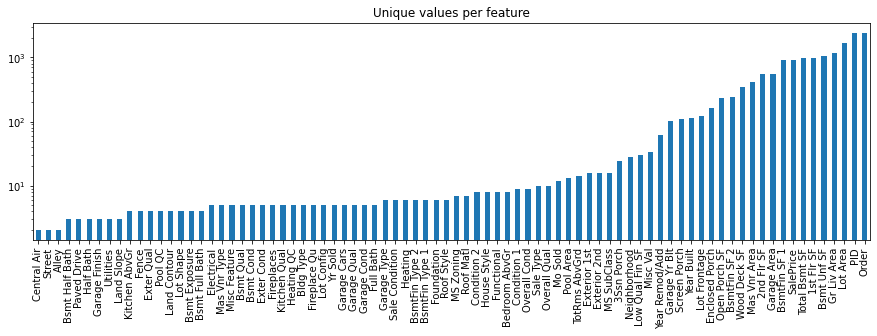

In [6]:
unique_values.plot.bar(logy=True, figsize=(15, 4), title="Unique values per feature");

**Comments:** 
We can see that most of the features have less than 40 unique values, mainly due to categorical and ordinal data related to the conditions of the houses or the type of raw material used in the houses. We can count 21 features with more than 29 unique values which are continuous features.

There are 80 features (excluding Order and PID) Can be divided into 4 categories: _non numerical ordinal features_ and _non numerical categorical features_, _Numerical discret features_ and _numerical continuous features_. For each of these categories we are applying different cleaning methods: 

## Dataset Quality and Cleaning 
We are now looking at the quality of the dataset (duplicates, missing values, unwanted entries). 

### Looking at empty or partially empty columns

In [7]:
import missingno as msno

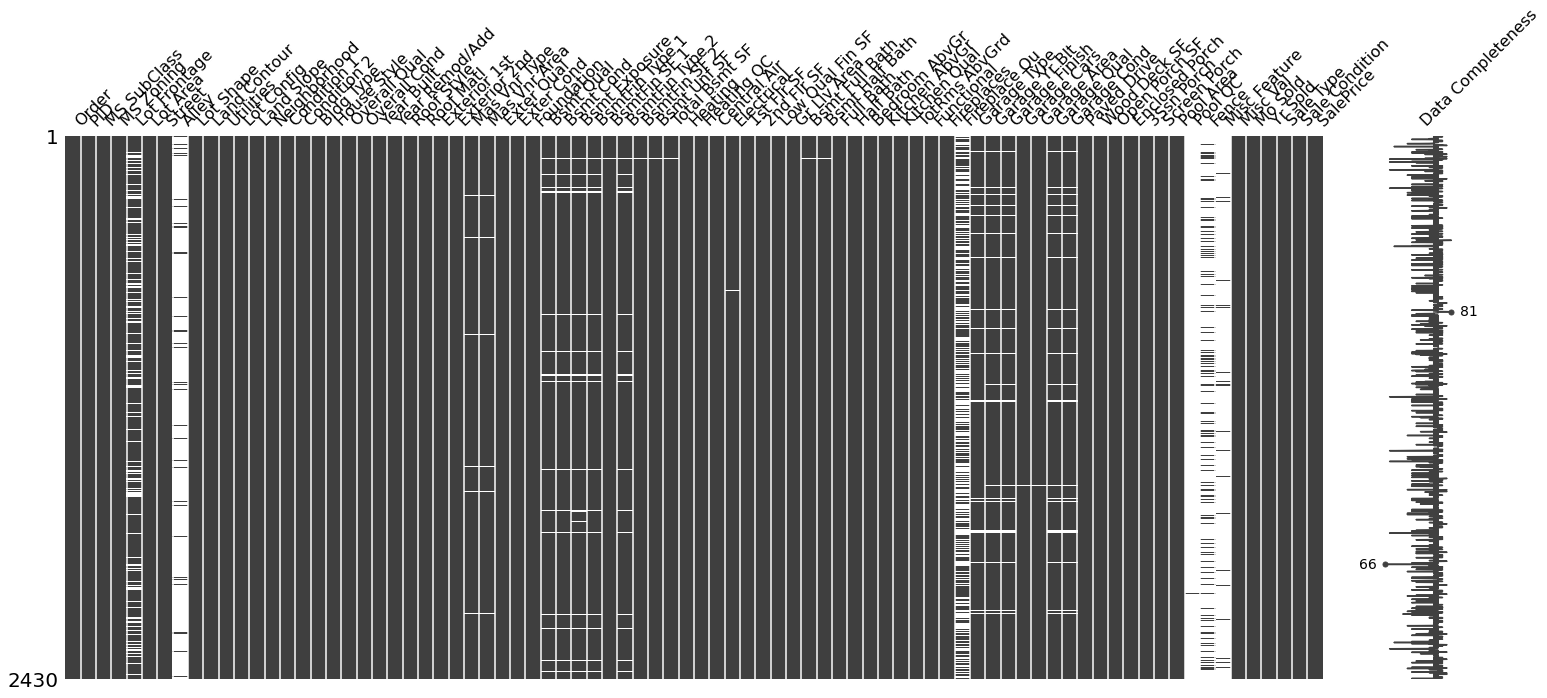

In [8]:
msno.matrix(df, labels=True);

,Missing values,Percentage of missing values
Pool QC,2418,99.51
Misc Feature,2340,96.30
Alley,2267,93.29
Fence,1941,79.88
Fireplace Qu,1186,48.81
Lot Frontage,420,17.28
Garage Cond,138,5.68
Garage Finish,138,5.68
Garage Yr Blt,138,5.68
Garage Qual,138,5.68


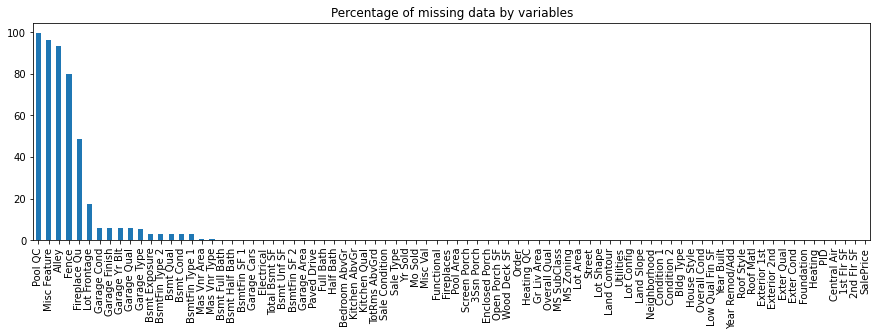

In [9]:
# Calculate the number of isnull values per column
missing_values = df.isnull().sum()

# Calculate the percentage of isnull values per column
missing_values_in_percent = np.round(df.isnull().mean() * 100, 2)

# Build a dataframe to store the number of missing values and their percentage for each column. 
columns_list = list(df.columns)
d = {"Missing values": missing_values, "Percentage of missing values": missing_values_in_percent }
missing_summary = pd.DataFrame(index=columns_list, columns=["Missing values", "Percentage of missing values"], data=d).sort_values(by="Percentage of missing values", ascending=False)

# Set the option to display all rows
pd.set_option('display.max_rows', None)
missing_summary["Percentage of missing values"].plot.bar(figsize=(15, 4), title="Percentage of missing data by variables");
missing_summary.head(40)

**Comments and cleaning strategy:** 
 - A) We can see that only 6 variables have more than 10% of missing values. We can suppose that most of the missing values on these features are due to the fact that there are no pool, misc feature, alley, fences, fireplaces, garages, basements, street connected to the property (lot frontage). 
therefore, we will replace these missing values by NA for non numerical values and 0 for numerical values.
 - B) However for the masonery and the rest of missing values which have less than 21 missing values, we will not replace the values and delete the rows themselves. 

Consequently, we remove the Order and PID columns first, before dividing the list of features into 4 categories : 
- 1) **numerical discrete features (Less than 20 unique values)**: We replace missing values by the most frequent value or by the median
- 2) **numerical continuous features (more than 20 unique values)**: We replace missing values by median values
- 3) **non numerical ordinal features**: We replace missing values by missing. In a later stage, we will categorize the data according to their rank and convert them into numerical ordinal data from 0 to X. 
- 4) **non numerical categorical features**: We replace missing values by "missing" or by the most frequent value

In [10]:
# We exclude the 2 columns Order and PID 
df_2 = df.copy()
df_2.drop(columns=["Order", "PID"], inplace=True)

### Creation of lists of numerical and non numerical features

In [11]:
# Creation of the list of non-numerical features
non_numerical_list = list(df_2.select_dtypes(include=["object", "category"]).columns)

# Creation of the list of numerical features
numerical_list = list(df_2.select_dtypes(include=["float", "int64"]).columns)


In [12]:
print(non_numerical_list), df[non_numerical_list].shape

['MS Zoning', 'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating', 'Heating QC', 'Central Air', 'Electrical', 'Kitchen Qual', 'Functional', 'Fireplace Qu', 'Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond', 'Paved Drive', 'Pool QC', 'Fence', 'Misc Feature', 'Sale Type', 'Sale Condition']


(None, (2430, 43))

In [13]:
print(numerical_list), df[numerical_list].shape

['MS SubClass', 'Lot Frontage', 'Lot Area', 'Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces', 'Garage Yr Blt', 'Garage Cars', 'Garage Area', 'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch', 'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold', 'SalePrice']


(None, (2430, 37))

** Comments:** We have now 80 features divided into two categories. We are now dividing them into ordinal and categorical features

### Creation of lists of continuous and discrete numerical features
After carefully looking at the documentation, we identify as continuous features, features which have more than 20 unique values. Therefore, we will consider as discrete, numerical features with less than 20 unique values. 

In [14]:
# Creates mask to identify numerical features with more than 20 unique features
cols_continuous = df_2.select_dtypes(include="number").nunique() >= 20

# Create 2 new dataframes which contains the continuous and discrete features
continuous_features= list(df_2[cols_continuous[cols_continuous].index].columns)
discrete_features = list(df_2[cols_continuous[~cols_continuous].index].columns)

# checking the shape of the groups:
df_2.shape, df_2[numerical_list].shape, df_2[continuous_features].shape, df_2[discrete_features].shape, print(continuous_features), print(discrete_features)

['Lot Frontage', 'Lot Area', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Garage Yr Blt', 'Garage Area', 'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch', 'Misc Val', 'SalePrice']
['MS SubClass', 'Overall Qual', 'Overall Cond', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces', 'Garage Cars', 'Pool Area', 'Mo Sold', 'Yr Sold']


((2430, 80), (2430, 37), (2430, 22), (2430, 15), None, None)

### Cleaning data

In [15]:
# Show the top few missing values (another methode to visualize missing values)
df_2.isna().sum().sort_values(ascending=False).head(20)

Pool QC           2418
Misc Feature      2340
Alley             2267
Fence             1941
Fireplace Qu      1186
Lot Frontage       420
Garage Cond        138
Garage Finish      138
Garage Yr Blt      138
Garage Qual        138
Garage Type        136
Bsmt Exposure       74
BsmtFin Type 2      72
Bsmt Cond           71
Bsmt Qual           71
BsmtFin Type 1      71
Mas Vnr Area        20
Mas Vnr Type        20
Bsmt Full Bath       2
Bsmt Half Bath       2
dtype: int64

#### Deleting rows when there are less than 21 missing values in the column

In [16]:
# Identify columns with less than 21 missing values
col_rows_to_remove = df_2.columns[df_2.isnull().sum() < 21]

# Drop rows where these columns have missing values
df_2 = df_2.dropna(subset=col_rows_to_remove, axis=0)


#### Cleaning non numerical features

In [17]:
# Identify non numerical data with at least 1 missing value 
nn_col_to_clean = list(df_2[non_numerical_list].columns[(df_2[non_numerical_list].isnull().sum() >=1)])
nn_col_to_clean

['Alley',
 'Bsmt Qual',
 'Bsmt Cond',
 'Bsmt Exposure',
 'BsmtFin Type 1',
 'BsmtFin Type 2',
 'Fireplace Qu',
 'Garage Type',
 'Garage Finish',
 'Garage Qual',
 'Garage Cond',
 'Pool QC',
 'Fence',
 'Misc Feature']

When there is no pool, alley, or fireplace, we replace NA values with “missing”. This way, we retain valuable information about the presence or absence of these features in the house and adapt the column to be fitted into a machine learning model. Additionally, most of these features are categorical, making this approach well-suited.

In [18]:
no_items = ["Alley", "Bsmt Qual", "Bsmt Cond", "Bsmt Exposure", "BsmtFin Type 1", "BsmtFin Type 2", "Fireplace Qu", "Garage Type", "Garage Finish", "Garage Qual", "Garage Cond", "Pool QC", "Misc Feature", "Fence"]

In [19]:
# Replace NA with "Missing"
for column in no_items:
    df_2[column].fillna(value="Missing", inplace=True)

In [20]:
# Checking if the values have been well replaced
df_2[no_items].isnull().sum().sum()

0

#### Cleaning numerical features

##### Cleaning continuous numerical features

In [21]:
# Identify features with at least one missing value 
n_cont_col_to_clean = list(df_2[continuous_features].columns[(df_2[continuous_features].isnull().sum() >=1)])
n_cont_col_to_clean

['Lot Frontage', 'Garage Yr Blt']

There are 138 missing Garage Year Blt data and 420 "Lot Frontage" Data. We replace these missing values by 0 when there are no garage nor lot frontage. 

In [22]:
# Replace missing values by 0
df_2[n_cont_col_to_clean] = df_2[n_cont_col_to_clean].fillna(0)

##### Cleaning discrete numerical features

In [23]:
# Identify features with at least one missing value 
n_disc_col_to_clean = list(df_2[discrete_features].columns[(df_2[discrete_features].isnull().sum() >=1)])
n_disc_col_to_clean

[]

In [24]:
# Checking the remaining null values and shape of the dataframe.
df_2.isnull().sum().sum(), df_2.shape

(0, (2406, 80))

<AxesSubplot:>

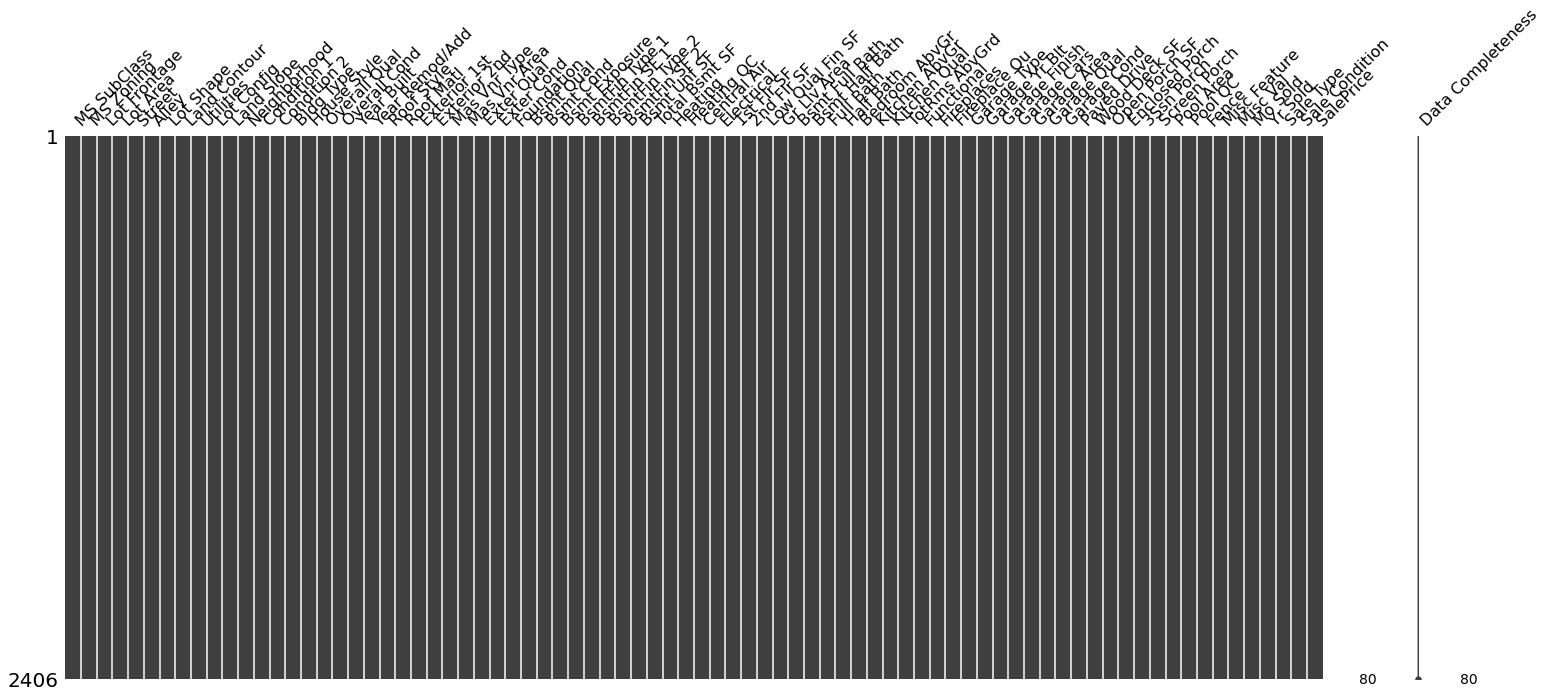

In [25]:
# Matrix cleaned
msno.matrix(df_2, labels=True)

**Comments:** The aren't duplicates in the dataset. By excluding the identifiers columns, we can see that none of house entries has been registered twice in the dataset. 
We are now analyzing data based on their content: 

### Checking unwanted entries, outliers and recording errors

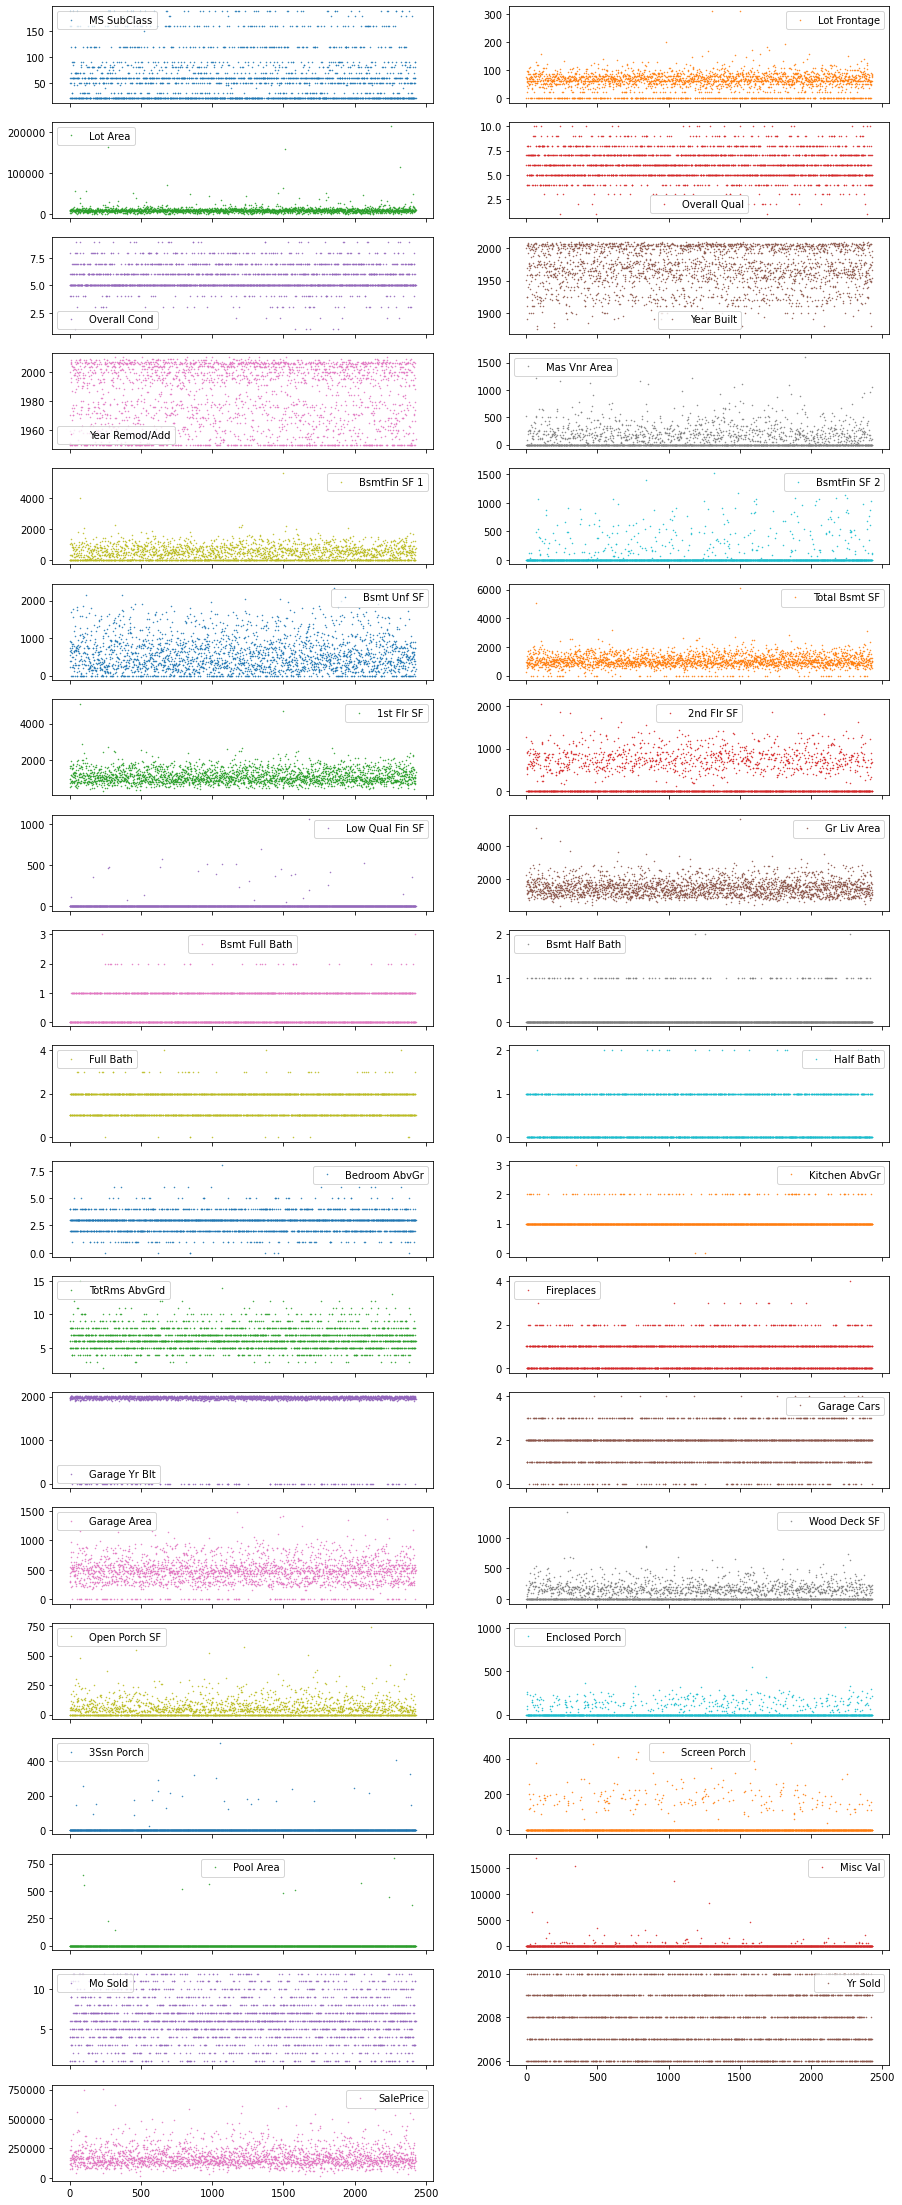

In [26]:
df_2.plot(lw=0, marker=".", subplots=True, layout=(-1, 2), figsize=(15, 40), markersize=1);

**Comments:** We do not see major whole in the dataset. There seems to be errors and outliers, but we will look at it more closely in the next part. 

In [27]:
print(f"The shape of the dataframe df is {df_2.shape}")

The shape of the dataframe df is (2406, 80)


## Features Analysis
We are looking more closely at the data for each group, 

**For non numerical features**, we are working on two hypothesis, we will first consider the distribution of non numerical features trying to represent the most common house/ appartment in the city of Ames. Then, we will focus our attention on the neighborhood, which is a feature known for having a strong impact on the price. Finally, we will look at the link between features and the target (Sale Price) to select the features to keep in the simple and intermediate models. 

**For numerical features** We are dividing our analysis in two groups with continuous and discrete features looking at the distribution of data before looking at the link with the target.

### Exploratory Analysis of non numerical features

#### First hypothesis : Distribution of non numerical features - Building the typical house

In [28]:
# Display non-numerical features
df_2[non_numerical_list].head()

,MS Zoning,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,...,Garage Type,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Pool QC,Fence,Misc Feature,Sale Type,Sale Condition
0,RL,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,BuiltIn,Fin,TA,TA,Y,Missing,Missing,Missing,WD,Normal
1,RL,Pave,Missing,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Missing,Missing,Missing,WD,Normal
2,RM,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,...,Attchd,Unf,TA,TA,Y,Missing,Missing,Missing,WD,Normal
3,RL,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,RFn,TA,TA,Y,Missing,Missing,Missing,WD,Normal
4,RM,Pave,Missing,IR1,Bnk,AllPub,Inside,Gtl,OldTown,Feedr,...,Detchd,Unf,TA,TA,N,Missing,MnPrv,Missing,WD,Normal


**Comments:** We are analysing the number of unique value per non numerical features. It should give us more insights on Ames housing market. 

In [29]:
# Display the number of unique values by feature
unique_non_num_values = df_2.select_dtypes(exclude="number").nunique().sort_values()
unique_non_num_values.sort_values(ascending=False).head(10)

Neighborhood      28
Exterior 1st      16
Exterior 2nd      16
Sale Type         10
Condition 1        9
Condition 2        8
House Style        8
Functional         8
Roof Matl          7
BsmtFin Type 1     7
dtype: int64

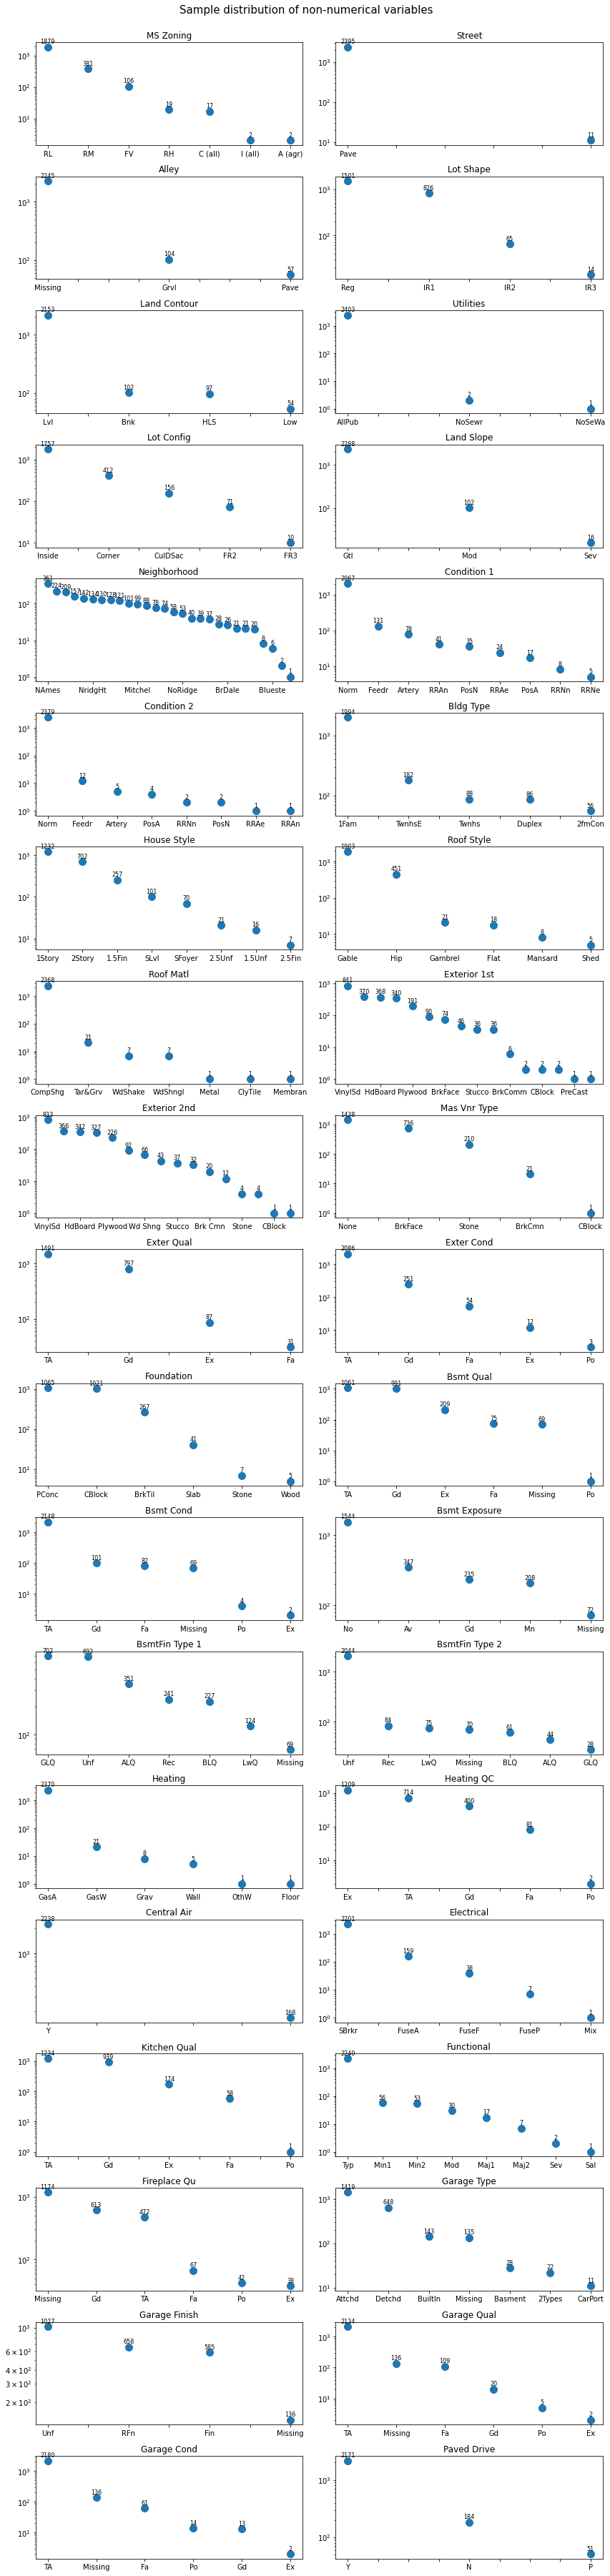

In [30]:
# Looking at the distribution of features
df_non_numerical = df_2[non_numerical_list] 

# Create figure object with 39 subplots
fig, axes = plt.subplots(ncols=2, nrows=19, figsize=(12, 50))
plt.suptitle("Sample distribution of non-numerical variables", fontsize=15, y=1.0)
# Loop through features and put each subplot on a matplotlib axis object
for col, ax in zip(df_non_numerical.columns, axes.ravel()):

    # Select one single feature and counts the number of occurrences per unique value
    df_non_numerical[col].value_counts().plot(logy=True, title=col, lw=0, marker="o", markersize=10, ax=ax)
    
     # Annotate each point with its value using annotate()
    for i, (index, value) in enumerate(df_non_numerical[col].value_counts().items()):
        ax.annotate(str(value),(i, value), textcoords="offset points", ha='center', xytext=(0, 5),fontsize=8)
    
plt.tight_layout()

**Comments:** We can see that the number of unique values for each non numerical feature is quite small, between 3 and 9 possibilities for each feature. Quite logically, for the neighborhood name and for the type of exterior covering on house (exterior 1 and exterior 2), the number of possibility is high. 

If we look deeper at the result, we can see that for each non-numerical feature, 1 unique condition is seen on a large number of houses. As an example, 1890 houses over a total of 1879 houses are located in Residential low density (MS Zoning:RL),2403 houses have all utilities with a roof material in standart composite shingle (2370entries), heating with gas forced warm air (2370 ent.), with central air conditioning (2238 ent.), and a garage in average condition (2180ent.) and with the house sale done in normal condition (2009 ent.). We can suppose that features which have a unique value which appear more than 2000 times over a total of 2406 houses will have a low impact on the sale price and the correlation study may give us more insight on that.

Consequently, we will focus more on features which have more variability such as the neighborhood, the house style , the garage type, the kitchen condition, the heating quality and basement quality. 
We are now looking at numerical features before studying the relationships with the Sale Price. 


#### Impact of the neighborhood on the Sale Price: 
The location of a house often considered as having a strong impact on prices. Lets look at the feature more closely with median price. 


In [31]:
median_sale_price = df_2.groupby('Neighborhood')['SalePrice'].median().round()
number_sales = df_2.groupby('Neighborhood')['SalePrice'].count().round(0)

In [32]:
neighborhood_df = pd.concat([number_sales, median_sale_price], axis=1)
neighborhood_df.columns = ['number_sales', 'median_sale_price']
print("Neighborhood median house sale price")
neighborhood_df.sort_values(by='median_sale_price', ascending=False)

Neighborhood median house sale price


,number_sales,median_sale_price
Neighborhood,,
StoneBr,40,318950.0
NridgHt,134,315500.0
NoRidge,53,315000.0
GrnHill,2,280000.0
Veenker,20,265000.0
Timber,58,242750.0
Somerst,142,227340.0
Crawfor,78,204068.0
ClearCr,39,200500.0


**Comments:** We can see a strong heterogeneity in median sale price among neighborhood. it goes from $92450 up to $318 950.

After having created different groups, we analyse the relationships of variables with Sales Price. We start with the numerical features before analysis the relationship of non numerical features. We will log transform the target to identify relationship between variables. 

#### Relationships between non numerical features and the target

##### Non numerical features analysis (ordinal and categorical data)

In [33]:
# Specify y_value
y_value = df_2["SalePrice"]

# Establish number of columns and rows needed to plot all features
n_cols = 3
n_elements = len(df_2[non_numerical_list].columns)
n_rows = np.ceil(n_elements / n_cols).astype("int")
print(n_cols, n_rows)

3 15


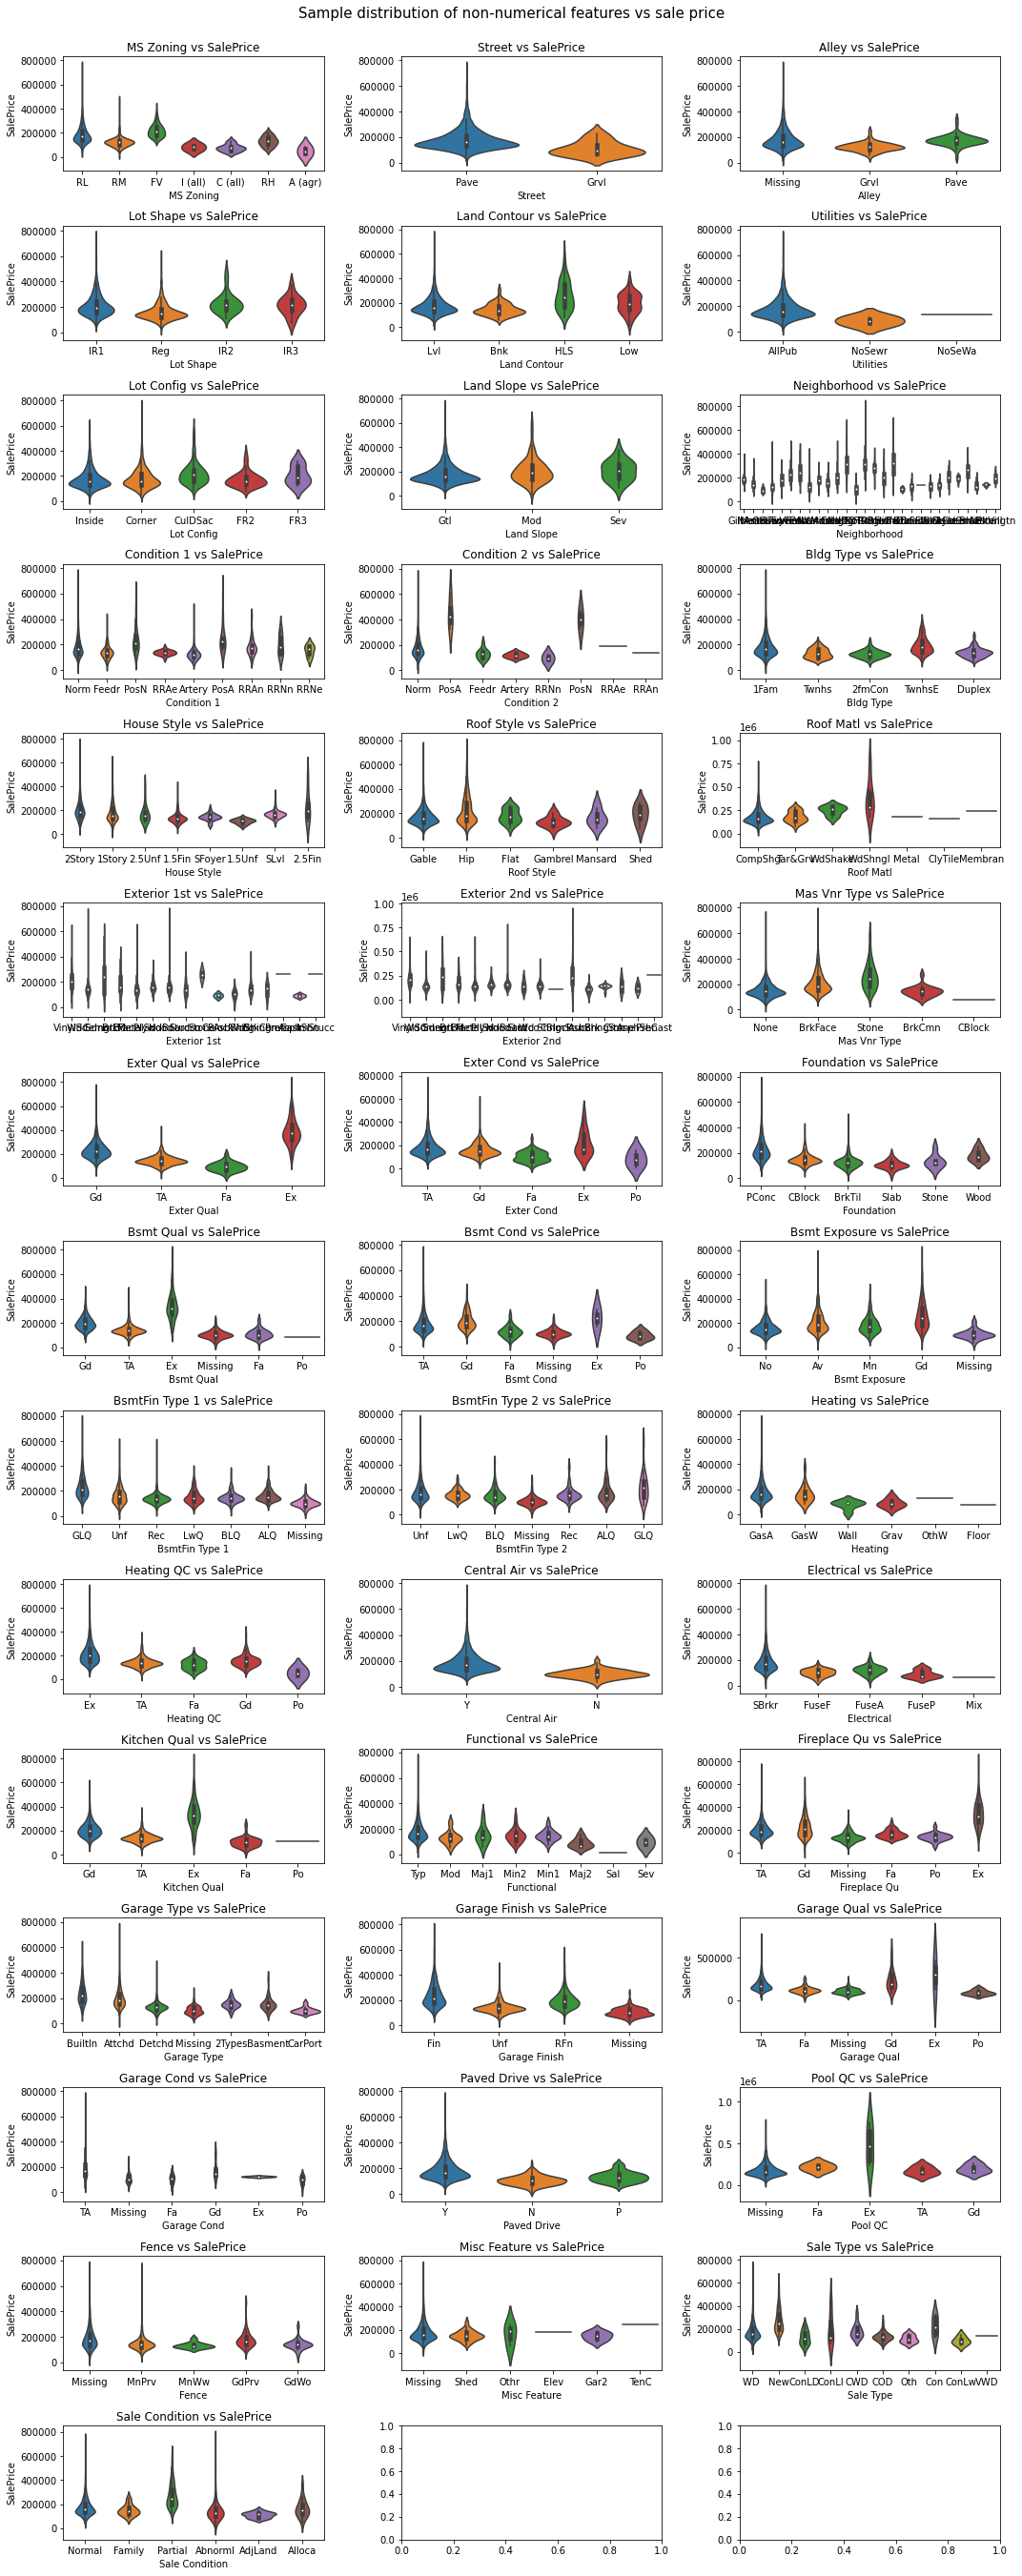

In [34]:
# Create figure object with as many rows and columns as needed
fig, axes = plt.subplots(ncols=n_cols, nrows=n_rows, figsize=(15, n_rows * 2.5))
plt.suptitle("Sample distribution of non-numerical features vs sale price", fontsize=15, y=1.0)
# Loop through these features and plot entries from each feature against the price
for col, ax in zip(df_2[non_numerical_list].columns, axes.ravel()):
    sns.violinplot(data=df_2[non_numerical_list], x=col, y=y_value, ax=ax)
    ax.set_title(f'{col} vs SalePrice')
plt.tight_layout()

In [35]:
# Specify features of interest
nn_selected_features = ["Neighborhood", "Exterior 1st", "Exterior 2nd"]

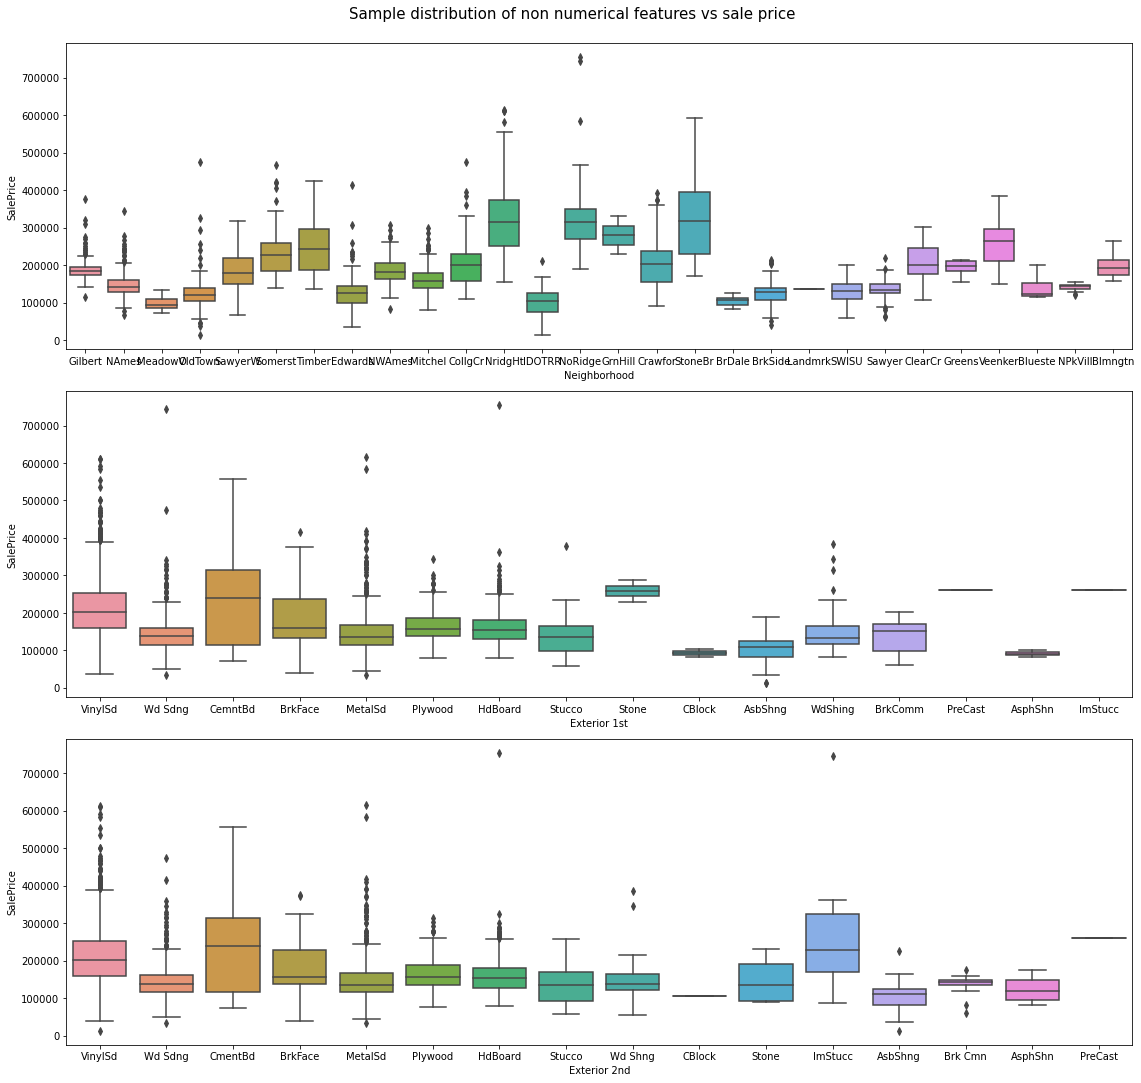

In [36]:
# Create a figure with 3 x 2 subplots
fig, axes = plt.subplots(ncols=1, nrows=3, figsize=(16, 15))
plt.suptitle("Sample distribution of non numerical features vs sale price", fontsize=15, y=1.0)
# Loop through these features and plot entries from each feature against the price
for col, ax in zip(nn_selected_features, axes.ravel()):
    sns.boxplot(
        data=df,
        x=col,
        y=y_value,
        ax=ax
    )
plt.tight_layout()

**Comments:** As mentionned above, we can see a strong variability in Sales price due to the neighborhood, a lower variability on the exterior covering the house(we can mention that houses with stone tend to have higher prices and lower variability) and very few differences on median price due to the house style.

**Decision**: We select the "neighborhood" as a major feature to build our simplified model.  

##### Converting non numerical ordinal features into numerical features : Label encoding
Ordinal features must be converted into numerical features before fitting a model because most of the machine learning model works better with numerical data. Indeed, the linear regression model performs mathematical operations which will be easily done with numerical data. In addition, it can recognizes and utilizes the inherent order in the data.
We are using the documentation to convert ordinal features. 


In [37]:

# Mapping ordinal data into numerical features
df_2["Lot Shape"] = df_2["Lot Shape"].map({"Missing":0,"Reg":1,"IR1":2,"IR2":3,"IR4":4}, na_action="ignore" ).fillna(0)
df_2["Utilities"] = df_2["Utilities"].map({"Missing":0,"AllPub":1,"NoSewr":2,"NoSewa":3,"ELO":4}, na_action="ignore" ).fillna(0)
df_2["Land Slope"] = df_2["Land Slope"].map({"Missing":0,"Gtl":1,"Mod":2,"Sev":3}, na_action="ignore").fillna(0)
df_2["Exter Qual"] = df_2["Exter Qual"].map({"Missing":0,"Po":1,"Fa":2,"TA":3, "Gd":4, "Ex":5}, na_action="ignore" ).fillna(0)
df_2["Exter Cond"] = df_2["Exter Cond"].map({"Missing":0,"Po":1,"Fa":2,"TA":3, "Gd":4, "Ex":5}, na_action="ignore" ).fillna(0)
df_2["Bsmt Qual"] = df_2["Bsmt Qual"].map({"Missing":0,"Po":1,"Fa":2,"TA":3, "Gd":4, "Ex":5}, na_action="ignore" ).fillna(0)
df_2["Bsmt Cond"] = df_2["Bsmt Cond"].map({"Missing":0,"No":1,"Mn":2,"Av":3, "Gd":4}, na_action="ignore" ).fillna(0)
df_2["Bsmt Exposure"] = df_2["Bsmt Exposure"].map({"Missing":0,"NA":0, "No":1, "Mn":2,"Av":3, "Gd":4}, na_action="ignore" ).fillna(0)
df_2["BsmtFin Type 1"] = df_2["BsmtFin Type 1"].map({"Missing":0, "LwQ":1,"Rec":2,"BLQ":3, "ALQ":4, "GLQ":5}).fillna(0)
df_2["BsmtFin Type 2"] = df_2["BsmtFin Type 2"].map({"Missing":0, "LwQ":1,"Rec":2,"BLQ":3, "ALQ":4, "GLQ":5}).fillna(0)
df_2["Heating QC"] = df_2["Heating QC"].map({"Missing":0, "Po":1,"Fa":2,"TA":3, "Gd":4, "Ex":5}).fillna(0)
df_2['Electrical'] = df_2['Electrical'].map({'Mix':0, 'FuseP':1,'FuseF':2,'FuseA':3,'SBrkr':4}, na_action='ignore').fillna(0)
df_2["Kitchen Qual"] = df_2["Kitchen Qual"].map({"Missing":0,"Po":1,"Fa":2,"TA":3, "Gd":4, "Ex":5}, na_action="ignore" ).fillna(0)
df_2["Functional"] = df_2["Functional"].map({"Missing":0,"Typ":0,"Min1":2,"Min2":3, "Mod":4, "Maj1":5, "Maj2":6, "Sev":7, "Sal":8}, na_action="ignore" ).fillna(0)
df_2["Fireplace Qu"] = df_2["Fireplace Qu"].map({"Missing":0,"Po":1,"Fa":2,"TA":3, "Gd":4, "Ex":5}, na_action="ignore" ).fillna(0)
df_2["Garage Finish"] = df_2["Garage Finish"].map({"Missing":0, "Na":0,"Unf":1,"Rough Finished":2, "Finished":3}).fillna(0)
df_2["Garage Qual"] = df_2["Garage Qual"].map({"Missing":0, "Po":1,"Fa":2,"TA":3, "Gd":4, "Ex":5}).fillna(0)
df_2["Garage Cond"] = df_2["Garage Cond"].map({"Missing":0, "Po":1,"Fa":2,"TA":3, "Gd":4, "Ex":5}).fillna(0)
df_2["Paved Drive"] = df_2["Paved Drive"].map({"Missing":0, "N":1,"P":2,"Y":3}).fillna(0)
df_2["Pool QC"] = df_2["Pool QC"].map({"Missing":0,"Fa":1,"TA":2, "Gd":3, "Ex":4}, na_action="ignore" ).fillna(0)
df_2["Fence"] = df_2["Fence"].map({"Missing":0,"MnWw":1,"GdWo":2, "MnPry":3, "GdPry":4}, na_action="ignore" ).fillna(0)
df_2.head(2)

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,60,RL,0.0,8795,Pave,Missing,2.0,Lvl,1.0,Inside,...,0,0,0.0,Missing,0,4,2009,WD,Normal,236000
1,20,RL,75.0,10170,Pave,Missing,1.0,Lvl,1.0,Corner,...,0,0,0.0,Missing,0,6,2006,WD,Normal,155000


In [38]:

# Checking if the list of features is well converted
non_numerical_ordinal_list = ["Lot Shape", "Utilities", "Land Slope", "Exter Qual", "Exter Cond", "Bsmt Cond", "Bsmt Qual", "Bsmt Exposure", "BsmtFin Type 2", "BsmtFin Type 1", "Heating QC","Electrical", "Kitchen Qual", "Functional", "Fireplace Qu", "Garage Finish", "Garage Qual","Garage Cond", "Paved Drive", "Pool QC", "Fence"]
len(non_numerical_ordinal_list)
df_2[non_numerical_ordinal_list].select_dtypes(exclude="number").nunique().sort_values()

Series([], dtype: float64)

There are no more non-numerical data into ordinal non numerical features. Lets do the same with numerical data. 

### Exploratory Analysis of Numerical continuous features

#### Continuous features distribution and removing outliers

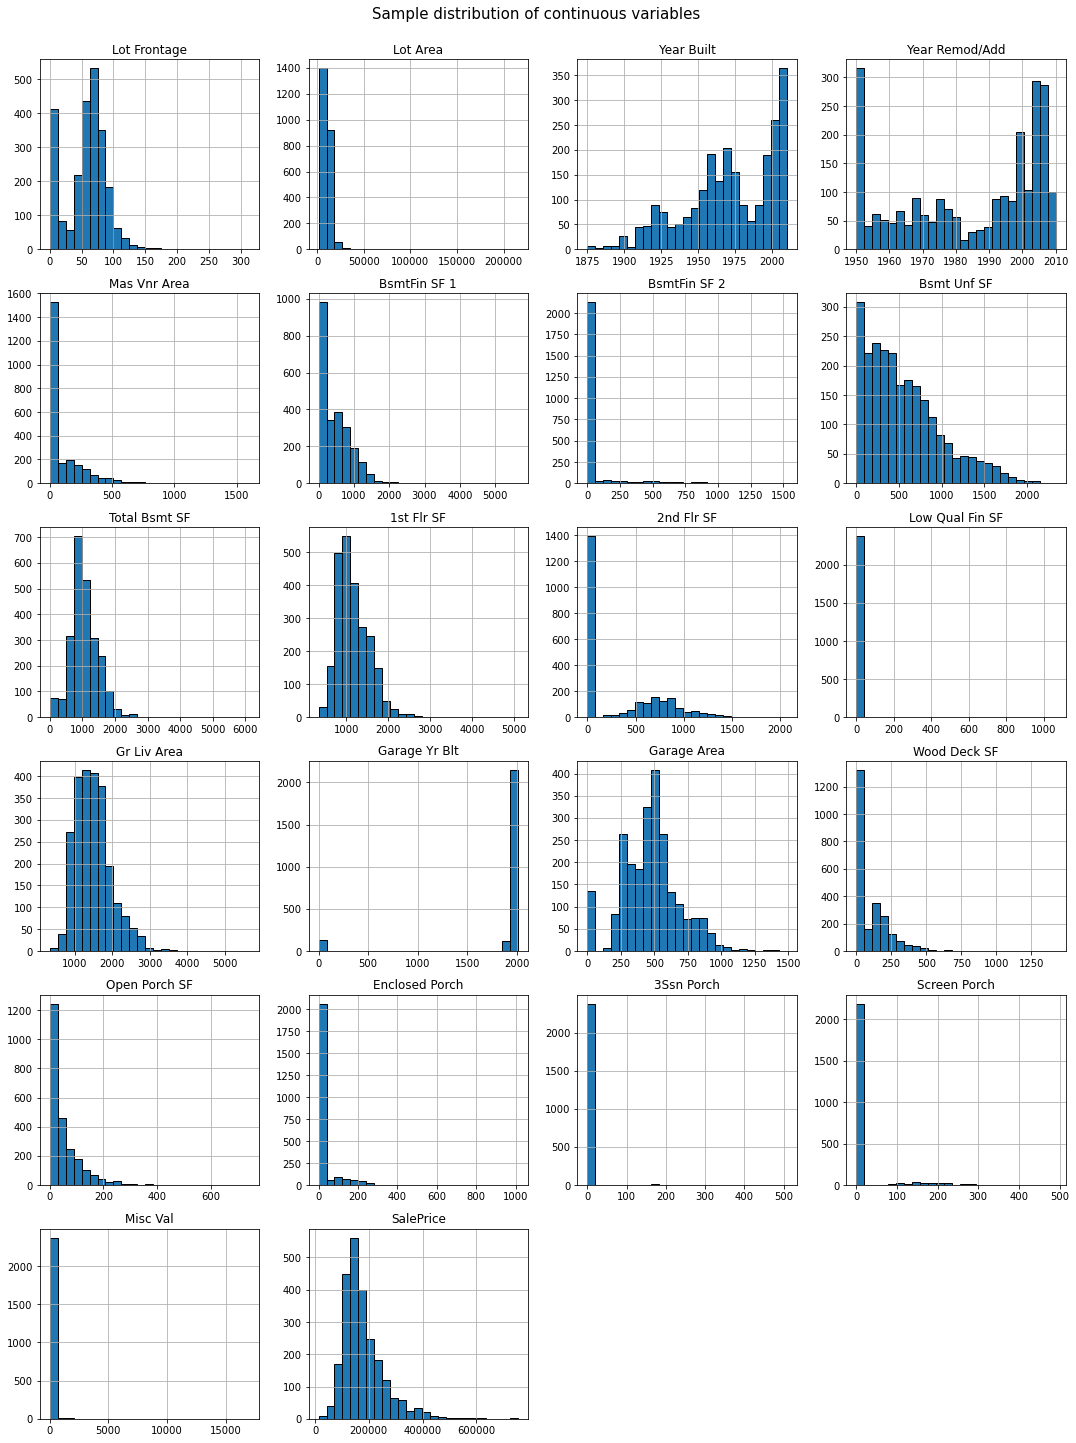

In [39]:
# Plots the histogram for each continuous feature in a separate subplot
df_2[continuous_features].hist(bins=25, figsize=(15, 20), layout=(-1, 4), edgecolor="black")
plt.suptitle("Sample distribution of continuous variables", fontsize=15, y=1.0)
plt.tight_layout()

- **Comments:** The features look well distributed; however, we identified a few errors and outliers:
  - errors: in the year of garage build; it cannot be above 2010, nor close to 0.
  - outliers: A few houses have a very high lot size (Lot Area).
  - outliers: High Type 1 finished square feet (BsmtFin SF1) which is well above the rest of the variables.
  - sale price: the distribution is slightly right-skewed. 
- **Decision:** We decided to exclude entries with a Lot Area above 30,000 square feet, Above Grade Living Area above 4,000 square feet, BsmtFin SF1 above 2,500 square feet, and Sale Price above $700,000. Additionally, we will remove data where Garage Yr Blt is above 2010.
As the Sales price us slightly right-skewed, we select the median as a baseline. 

In [40]:
# Filter outliers 
Filter_Outliers = (df_2["Gr Liv Area"] > 4000) | (df_2["BsmtFin SF 1"] > 2500) | (df_2["SalePrice"] > 700000) | (df_2["Lot Area"] > 30000) | (df_2["Garage Yr Blt"] >2010) | (df_2["Garage Yr Blt"] < 1000)
# Exclusion of outliers from the dataframe 
df_2 = df_2[~Filter_Outliers]

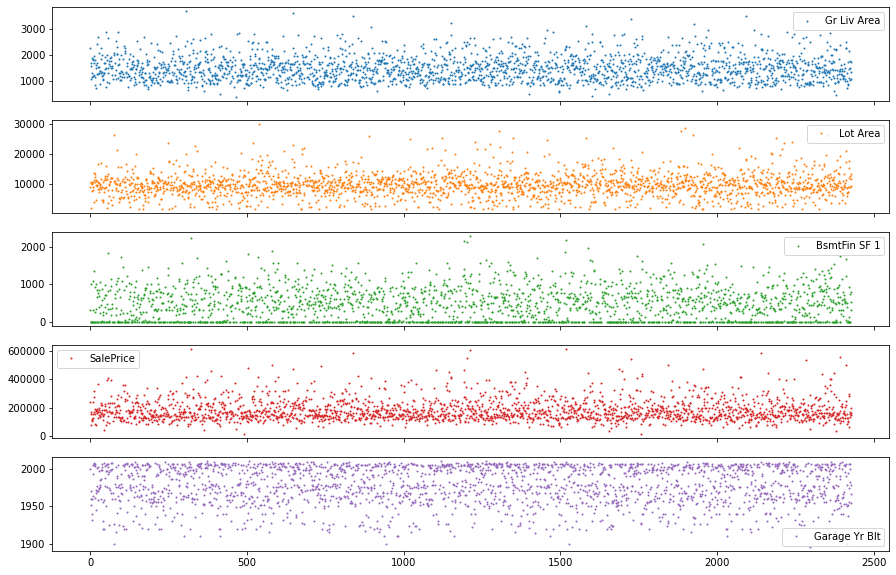

In [41]:
df_2[["Gr Liv Area", "Lot Area", "BsmtFin SF 1", "SalePrice", "Garage Yr Blt" ]].plot(
    lw=0, marker=".", subplots=True, figsize=(15, 10), markersize=2);

#### Relationships between continuous features and the target

In [42]:
# Using the correlation coefficient to determine the relationship between features and the sale price
df_2.corrwith(df["SalePrice"]).sort_values(ascending=False)

SalePrice          1.000000
Overall Qual       0.807962
Gr Liv Area        0.720208
Exter Qual         0.711431
Kitchen Qual       0.682458
Total Bsmt SF      0.660352
Garage Cars        0.654902
1st Flr SF         0.650939
Garage Area        0.636787
Bsmt Qual          0.617469
Year Built         0.567381
Garage Yr Blt      0.553081
Full Bath          0.545064
Year Remod/Add     0.542904
Fireplace Qu       0.537525
TotRms AbvGrd      0.511993
Mas Vnr Area       0.508623
Fireplaces         0.471156
Heating QC         0.460669
BsmtFin SF 1       0.442621
Bsmt Exposure      0.419316
Lot Area           0.367359
Open Porch SF      0.332182
BsmtFin Type 1     0.328091
Wood Deck SF       0.305658
Lot Shape          0.281994
Bsmt Full Bath     0.280409
Half Bath          0.274390
Paved Drive        0.236069
2nd Flr SF         0.234665
Electrical         0.227968
Garage Qual        0.203612
Lot Frontage       0.202054
Bsmt Unf SF        0.186890
Garage Cond        0.159866
Bedroom AbvGr      0

**Comments:** This result is particularly insightful as it confirms some intuitive assumptions while challenging others:

- Firstly, it highlights strong correlations between sale price and overall quality (81%), living area (71%), as well as garage and year of construction or remodeling.
- The number of rooms (51%) and bedrooms (13%) show moderate to low correlations, which contrasts with the expectation of a direct impact on sale price.
- Basement area (63% correlation) shows collinearity with above-ground living area, despite typically being considered a secondary criterion in house purchase decisions.
- Interestingly, pool area (3% correlation), lot area (36% correlation), and overall condition (-14% correlation) exhibit low correlations with sale price. Notably, a large majority of houses are rated 5 for overall condition.


As there are many continuous features, we will focus our attention on features which show the best correlations to build our models. 

In [43]:
# Specify continuous features of interest
ct_selected_features = ["Lot Area", "Year Built", "Year Remod/Add", "Total Bsmt SF", "Gr Liv Area", "Garage Area", "1st Flr SF"]
y_value = df_2["SalePrice"]

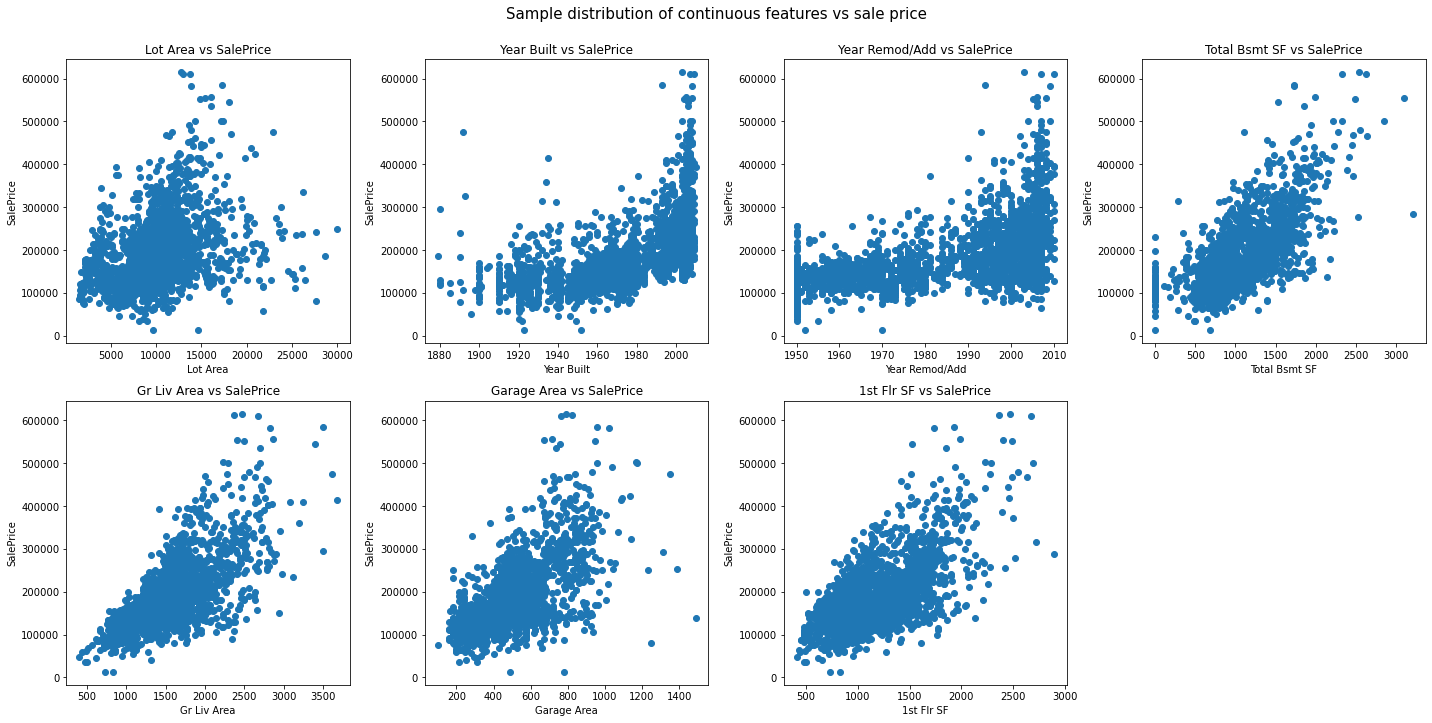

In [44]:
plt.figure(figsize=(20, 10))
plt.suptitle("Sample distribution of continuous features vs sale price", fontsize=15, y=1.0)
# Loop through these features and plot entries from each feature against the price
for i, feature in enumerate(ct_selected_features):
    plt.subplot(2, 4, i+1)
    plt.scatter(df_2[feature], y_value)
    plt.title(f'{feature} vs SalePrice')
    plt.xlabel(feature)
    plt.ylabel('SalePrice')

plt.tight_layout()  # Adjust subplots to fit into the figure area
plt.show()

**Comments:** 
- The lot area, living area, 1st floor area, garage area and basement area are showing a linear relationship with the sale price. It will be possible to model these features with a standart linear regression. In addition, we can build additional features looking if the garden area has an impact on prices ( lot area - living area) or if the space by car can affect prices. 
- the age of the building and the remodelling have a different impact on sales prices. We can see that recent constructions are showing a high variability with high and low prices. We will model this relation using a polynomial model.


### Exploratory Analysis of numerical discrete features

#### Discrete features distribution

In [45]:
df_2[discrete_features].head()

,MS SubClass,Overall Qual,Overall Cond,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Cars,Pool Area,Mo Sold,Yr Sold
0,60,7,5,0.0,0.0,2,1,4,1,8,1,2.0,0,4,2009
1,20,6,6,0.0,0.0,1,1,2,1,5,1,2.0,0,6,2006
2,160,4,5,0.0,0.0,1,1,3,1,6,0,1.0,0,1,2007
3,20,5,5,0.0,1.0,1,1,4,1,6,1,2.0,0,4,2010
4,190,7,4,0.0,0.0,1,1,4,2,9,1,1.0,0,1,2007


In [46]:
df_2[continuous_features].columns

Index(['Lot Frontage', 'Lot Area', 'Year Built', 'Year Remod/Add',
       'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF',
       'Total Bsmt SF', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF',
       'Gr Liv Area', 'Garage Yr Blt', 'Garage Area', 'Wood Deck SF',
       'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch',
       'Misc Val', 'SalePrice'],
      dtype='object')

In [47]:
# Missing values
df_2[discrete_features].isna().sum().sort_values(ascending=False).head(5)

MS SubClass       0
Overall Qual      0
Overall Cond      0
Bsmt Full Bath    0
Bsmt Half Bath    0
dtype: int64

**Comments:** In the case of discrete values, 
   - We decide not to replace 0 values for most of discrete features as it represent an order (ex, 0, 1, 2,...). 
   - We keep the pool area into the discrete group as there are not many houses with a pool and we cannot build a model based on the area of the pool, however, we will look if the presence of a pool has a strong impact on prices. 
   - We keep the year sold into the discrete group as there are just 4 years of observation and we cannot build a trend based on these 4 years

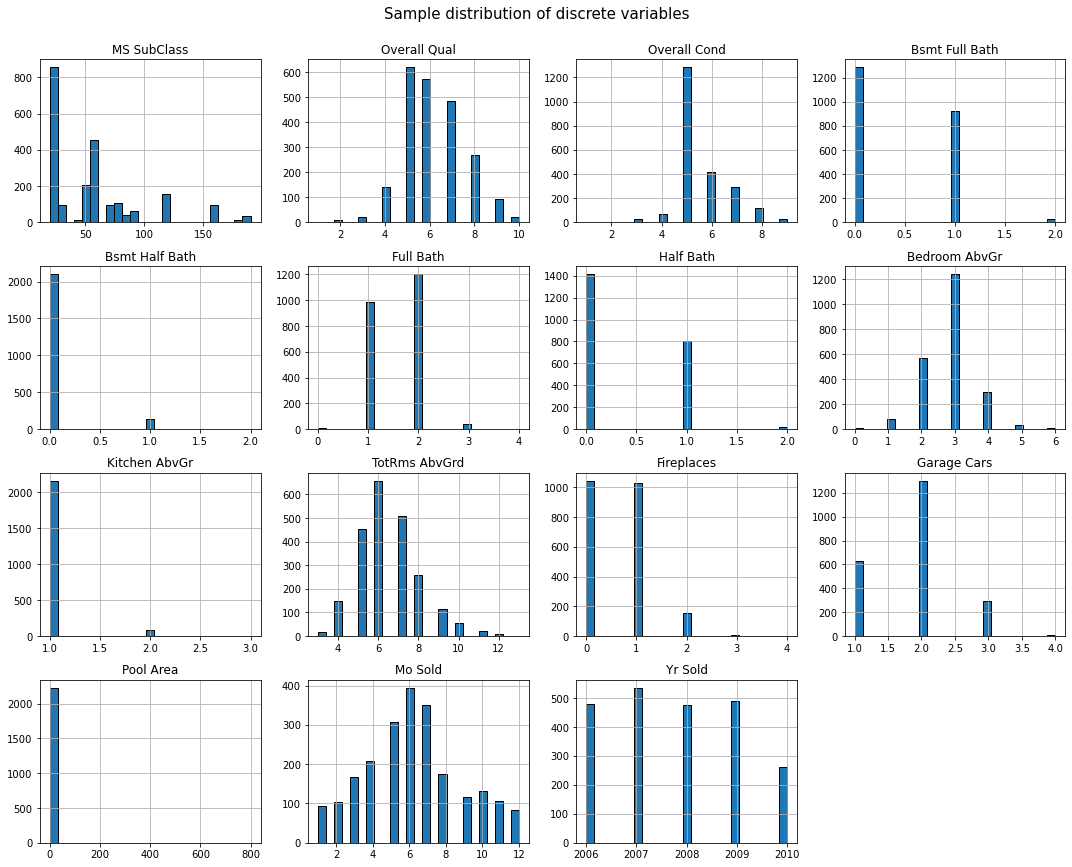

In [48]:
# Plots the violin plot for each discrete feature in a separate subplot
df_2[discrete_features].hist(bins=25, figsize=(15, 12), layout=(-1, 4), edgecolor="black")
plt.suptitle("Sample distribution of discrete variables", fontsize=15, y=1.0)
plt.tight_layout()

- **Comments:** Discrete data seems well distributed. These graph give us information about the dynamic of the housing market. It seems that most of the sales occur between May and July. The number of sales seems steady from 2006 up to 2009. In 2010, the number of sales fell and if the data have been well recorded for the full year, we can suppose that it is due to financial crisis in 2008/2009 impacting the mortgage and housing market. Consequently, it will be useful to look if the price/square foot fell that year. 

- Intuitively, among the major features which can have an impact on the sale price: 
     - We are looking at the number of bathrooms (typical house has 1 or 2 bathrooms), 
     - Parkings ( most of the houses have 2 parking spots for the cars) and fireplaces (half of the houses has a fireplace). 
     - The number of bedroom (Most of the houses have 3 bedrooms for a total of 6 rooms (ex:bathrooms)) 
     - Overall condition and quality (most of the houses are rated 5 for an overall quality of 5-6). 


#### Relationship between discrete features and target

As the number of feature is high, we are looking at the correlations between features and the sale price (target value). 

In [49]:
# Specify y_value (ideally a continuous feature)
y_value = df_2["SalePrice"]

# Establish number of columns and rows needed to plot all features
n_cols = 5
n_elements = len(df[discrete_features].columns)
n_rows = np.ceil(n_elements / n_cols).astype("int")
print(n_cols, n_rows)

5 3


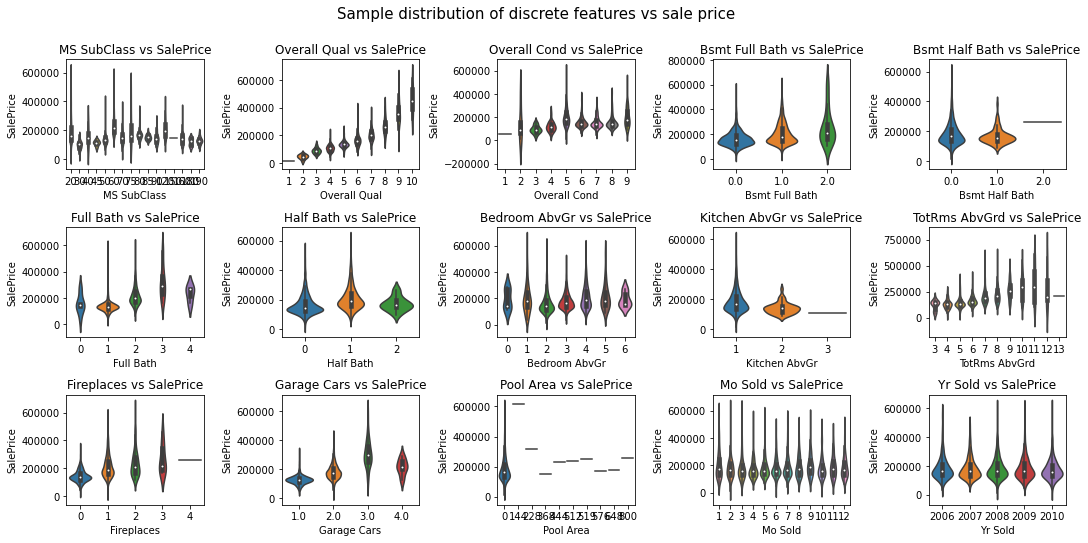

In [50]:
# Create figure object with as many rows and columns as needed
fig, axes = plt.subplots(ncols=n_cols, nrows=n_rows, figsize=(15, n_rows * 2.5))
plt.suptitle("Sample distribution of discrete features vs sale price", fontsize=15, y=1.0)
# Loop through these features and plot entries from each feature against the price
for col, ax in zip(df[discrete_features].columns, axes.ravel()):
    sns.violinplot(data=df_2[discrete_features], x=col, y=y_value, ax=ax)
    ax.set_title(f'{col} vs SalePrice')
plt.tight_layout()

**Comments and decisions:** 
- We can highlight a direct relationship between the Overall quality and the sale price. A polynomial/exponential model should be used to modelized the price. 
- The total number of rooms, the number of garage cars and the number of bathrooms have an impact on house price, but the relationship is not linear and a polynomial model should be used to modelize the price based on these features 


<a id="Part_2"></a>
# Models fitting and evaluations
Baseline: 
As mentionned above, we use the median as a baseline as Sale price data is right-skeawed


## Simple Model
In this model, **we have chosen 3 features, the age, the overall quality and the living area**. Firstly, the quality rating and the area were chosen because they show a good correlation with the target feature (81% and 71%, respectively). Additionally, the graphs above indicate a linear relationship. Secondly, we included age, as it is intuitively considered an important feature by buyers.

### Selection of features and matrix construction : Features engineering 
No transformation required for the living area or quality condition since these data are continuous and numerically scaled, respectively. However, feature engineering is required for the age, as its relationship with sale price is non-linear.
The MAE cost fonction, in USD has been selected as it helps to evaluate models easily and as there aren't many outliers into the cleaned dataset. 

In [51]:
# Define the MAE cost function
def MAE(y, y_pred):
    return np.mean(np.abs(y - y_pred))
# Define RSS measure
def RSS(y, y_pred):
    return np.sum(np.square(np.subtract(y, y_pred)))

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

### Create a Polynomial Features Year

In [53]:
#Create variables
x_year = df_2["Year Built"].values
y = df_2["SalePrice"].values

# Create the object
pf_obj_year = PolynomialFeatures(degree=3, include_bias=False)

In [54]:
#Create the polynomial features
X2_year = pf_obj_year.fit_transform(x_year[:, np.newaxis])

In [55]:
#Create variables
x_year = df_2["Year Built"].values
y = df_2["SalePrice"].values

# Create the object
pf_obj_year = PolynomialFeatures(degree=3, include_bias=False)
# Create the polynomial features
X2_year = pf_obj_year.fit_transform(x_year[:, np.newaxis])
# Get feature names
feature_names_yrs = pf_obj_year.get_feature_names_out()

print("Features:", feature_names_yrs)

Features: ['x0' 'x0^2' 'x0^3']


In [56]:

# Create linear regression
linreg_year = LinearRegression()
# Fit it
linreg_year.fit(X2_year, y)

# Generate values between min(x) and max(x)
x_values_year = np.linspace(min(x_year), max(x_year), num=X2_year.shape[0])
X_values2_year = pf_obj_year.transform((x_values_year[:, np.newaxis]))

# Model prediction
y_pred_year = linreg_year.predict(X_values2_year)
# Model Evaluation 
mae_yrs = MAE(y, y_pred_year)
print("MAE linear regression for year feature: ${:.0f}".format(mae_yrs))

MAE linear regression for year feature: $63331


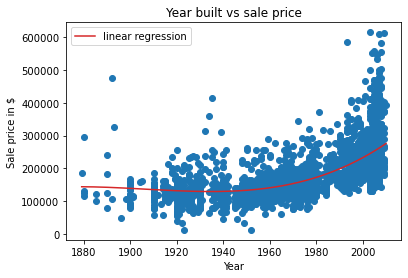

In [57]:
# Compute predictions
y_pred_year= linreg_year.predict(X_values2_year)
plt.scatter(x_year, y)
plt.plot(x_values_year, y_pred_year, c="C3", label="linear regression")

plt.title("Year built vs sale price")
plt.xlabel("Year")
plt.ylabel("Sale price in $")
plt.legend()
plt.show()

**Comments:** After checking several degrees of polynomial, we created a polynomial feature with a degree 3. We can see that it fits quite well with the data points and the mean absolute error is $ 63 978. It can be considered as a high value given the houses prices ranging from $127 89 and $615 000.

### Build the matrix with the age, quality conditions and living area

In [58]:
# Feature transformation to numpy with reshaping to get the same dimensions
x_area = df_2["Gr Liv Area"].values.reshape(-1,1)
x_qual = df_2["Overall Qual"].values.reshape(-1,1)
X1 = np.concatenate((X2_year, x_area, x_qual), axis=1)
X1.shape, x_area.shape, x_qual.shape, X2_year.shape

((2239, 5), (2239, 1), (2239, 1), (2239, 3))

**Comments:** We have now built a matrix X1 with 5 features including the polynomial 

### Build, fit the model, predict targets and evaluate
We decide to use a linear regression model provided by Scikit-learn as the number of feature is low and the estimator is easy to use.  

In [59]:
# Target
y1 = df_2["SalePrice"]
# Split the data
X1_tr, X1_val, y1_tr, y1_val = train_test_split(X1, y1, test_size=0.4, random_state=42)
X1_tr.shape, X1_val.shape, y1_tr.shape, y1_val.shape

((1343, 5), (896, 5), (1343,), (896,))

In [60]:
y.shape, X1.shape

((2239,), (2239, 5))

In [61]:
# Compute rank and condition number
M = X1.shape[1]  # Number of columns
rank = np.linalg.matrix_rank(X1)
cond = np.linalg.cond(X1)
print("Columns {} rank {} collinear {}".format(M, rank, M - rank))
print("Condition number:", cond)

Columns 5 rank 5 collinear 0
Condition number: 18484429626.580456


**Comments** Having a rank of 5 with 5 columns and no collinearity is agood news. It means that there are no redundant features. This will improve the performance of the machine learning algorithms and lead to more stable and interpretable model

#### Linear regression

**Comments:** We are using a linearRegression estimator as it is very convenient to use  to compute the OLS solution which uses the lstsq() function internally. It’s very convenient to work with this object since it implements the estimator API which includes the estimators fits, predict and score.

In [62]:
# Define RSS measure
def RSS(y, y_pred):
    return np.sum(np.square(np.subtract(y, y_pred)))

In [63]:
# Fit a linear regression model
from sklearn.linear_model import LinearRegression

In [64]:
# We calculate the log of the target training and validation sets
log_y1_tr = np.log10(y1_tr)
log_y1_val = np.log10(y1_val)


In [65]:
# Create a linear regression object
lr1 = LinearRegression() 
lr1.fit(X1_tr, log_y1_tr)  # Fit it to train data
# predict the target y1_pred_val
y1_pred_val = 10 ** lr1.predict(X1_val)

#### Evaluate the simple model 

In [66]:
mae_lr1 = MAE(y1_val, y1_pred_val)
rss_lr1 = RSS(y1_val, y1_pred_val)
print("MAE linear regression: ${:.0f}".format(mae_lr1))
print("RSS linear regression: ${:.0f}".format(rss_lr1))

MAE linear regression: $22296
RSS linear regression: $897104842331


In [67]:
# Compute the baseline on median value
y1_val_median = np.median(y1_val)
# broadcast y2_tr_median 
y1_val_median_array = np.full_like(y1_val, y1_val_median)

# Calculate MAE and RSS
mae_baseline_median = MAE(y1_val, y1_val_median_array)
rss_baseline_median = RSS(y1_val, y1_val_median_array)

print("MAE median baseline: ${:.0f}".format(mae_baseline_median))
print("RSS median baseline: {:.0f}".format(rss_baseline_median))

MAE median baseline: $54859
RSS median baseline: 5711010085465


In [68]:
# R^2 coefficient
R2 = 1 - (rss_lr1 / rss_baseline_median)
print("R^2 coefficient: {:.2f}".format(R2))

R^2 coefficient: 0.84


In [69]:
#  Double checking the R2 coefficient with score
lr1.score(X1_val, log_y1_val, sample_weight=None).round(2)

0.8

**Comments:** Using the linear regression model gives a MAE of $ 22218 with and R2 of 85%, these two results are corrects, we can accept this model. The score estimator confirms our calculation 

## Intermediate Model 

### Selection of features and creation of a matrix

- non-numerical features : As mentionned above, we base our selection on the frequency of unique values and based on the relationship of the feature with the target.
- numerical feature: We base our selection on the correlation coefficient between features and the target and the relationship with the price observed on the plots. 

#### Creation of new indicators 
Following the exploratory data analysis, we decided to create new features:
- Ratio Living area / Lot area : The living area relative to the total sizr of the house+garden
- Lot area - Living area : To see whether the size of the garden has an impact on price. 
- 1st floor / Living area : To see whether the 1st floor area relative to the total living area has an impact on the sale price. 

In [70]:
df_2.shape

(2239, 80)

In [71]:
# Calculation of the ratio Living area - lot area
df_2["ratio_living_tot"] = df_2["Gr Liv Area"] / df_2["Lot Area"]
df_2["garden"] = df_2["Lot Area"] - df_2["Gr Liv Area"]
df_2["ratio_1st"] = df_2["1st Flr SF"] / df_2["Gr Liv Area"]
df_2["car_space"] = df_2["Garage Area"] / df_2["Garage Cars"]
df_2.shape

(2239, 84)

In [72]:
y_value = df_2["SalePrice"]

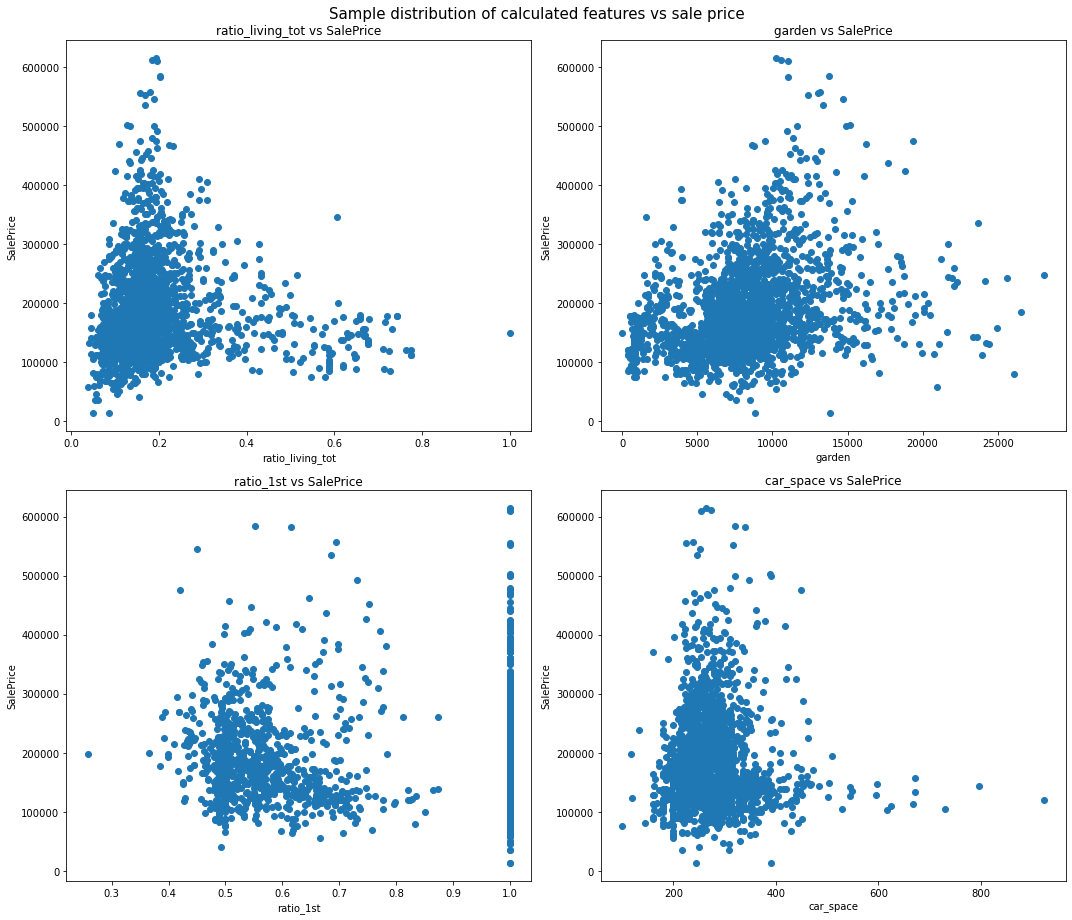

In [73]:
calculated_features = ["ratio_living_tot", "garden", "ratio_1st", "car_space"]
plt.figure(figsize=(15, 13))
plt.suptitle("Sample distribution of calculated features vs sale price", fontsize=15)

for i, feature in enumerate(calculated_features):
    plt.subplot(2, 2, i+1)  # 1 row, 3 columns for the subplots
    plt.scatter(df_2[feature], y_value)
    plt.title(f'{feature} vs SalePrice')
    plt.xlabel(feature)
    plt.ylabel('SalePrice')

plt.tight_layout()  # Adjust subplots to fit into the figure area
plt.show()

**Comments:** These 4 indicators give more information about the sales trend however, we cannot see a strong linear relationship between these features and the selling prices. Among the observations 1) The houses with the highest selling price tend to have a large garden relatively to the house living area with a ratio around 20%. On the opposite, houses with a small garden tend to be sold below $200 000 (ratio living tot above 60%). 
2) There is not a linear relationship between the size of the garden and the house price. Idem for the ratio between 1st floor vs living area. 
3) We cannot see a clear linear relationship between the space per car and the sale price. 
Consequently, we will not use these new features to feed our models. 

#### Selection of features manually
We select 15 features to build the intermediate model.

##### Selection of non numerical features: 8 features
We base the selection on features which have a unique value appearing less than 1500 times, having a relationship with the target and based on our knowledge of the housing market. 
- Kitchen Qual : Kitchen quality
- Lot Shape : shape of the lot
- Exter Qual : House exterior aspect
- Heating QC : Heating quality
- Foundation : brick and tile 
- Neighborhood 
- Exterior 1st : Exterior aspect
- House Style


##### Selection of numerical continuous features: 7 features
We based the selection on the correlations coefficients, relationship with the target and knowledge of the housing market.

**Discrete:** 
- Overall Qual : General Quality
- Fireplaces : Number of fireplaces
- TotRms AbvGrd : Total rooms above ground
- Full Bath : Number of bathrooms
**Continuous:**
- Garage Area : Garage area
- Gr Liv Area: Living area
- Year Built : Year of construction



#### Matrix construction

##### Non numerical features and encoding

**Comments:** We divide the non numerical features into categrorical and ordinal features. As ordinal features had been previously converted into integers with the map function, we need to do one hot encoding on non-numerical categorical features only. 

In [74]:
select_non_num_cat = ["Foundation", "Exterior 1st", "Neighborhood", "House Style"] # categorical select features
select_non_num_ordinal= ["Kitchen Qual", "Lot Shape", "Exter Qual", "Heating QC"] # features converted into integers based on their rank. 


In [75]:
# Select the non numerical feature 
df_nn = df_2[select_non_num_cat].copy()

# Create the dummy features and drop the redundant columns
encoded_df = pd.get_dummies(df_nn, drop_first=True)
encoded_df.head()

,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Exterior 1st_BrkComm,Exterior 1st_BrkFace,Exterior 1st_CBlock,Exterior 1st_CemntBd,Exterior 1st_HdBoard,...,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,House Style_1.5Unf,House Style_1Story,House Style_2.5Fin,House Style_2.5Unf,House Style_2Story,House Style_SFoyer,House Style_SLvl
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [76]:
# Creation of the matrix containing non numerical features
X2_nn_cat = encoded_df.values
X2_nn_ord = df_2[select_non_num_ordinal].values

##### Numerical features and standardization

In [77]:
# Select the numerical feature 
select_num = ["Overall Qual", "Fireplaces", "TotRms AbvGrd", "Full Bath", "Garage Area", "Gr Liv Area", "Year Built" ]
# Creation of the matrix containing numerical features
X2_n = df_2[select_num].values
df_2[select_num].describe()

,Overall Qual,Fireplaces,TotRms AbvGrd,Full Bath,Garage Area,Gr Liv Area,Year Built
count,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000
mean,6.167932,0.612327,6.413131,1.569897,497.325592,1495.874051,1972.631979
std,1.373315,0.637487,1.501095,0.541739,185.384762,470.895296,29.377232
min,1.000000,0.000000,3.000000,0.000000,100.000000,407.000000,1879.000000
25%,5.000000,0.000000,5.000000,1.000000,361.500000,1132.500000,1955.000000
50%,6.000000,1.000000,6.000000,2.000000,483.000000,1453.000000,1975.000000
75%,7.000000,1.000000,7.000000,2.000000,580.000000,1745.000000,2001.000000
max,10.000000,4.000000,13.000000,4.000000,1488.000000,3672.000000,2010.000000


**Comments:** After checking again the data, we standardize the data, necessary step to reduce overfitting of the model. We will standardize non numerical data as well as many features are ordinal. 

In [78]:
#Standardize the matrix
from sklearn.preprocessing import scale

# Standardize non numerical and numerical data
X2_nn_cat_standardized = scale(X2_nn_cat, axis=0)
X2_nn_ord_standardized = scale(X2_nn_ord, axis=0)
X2_n_standardized = scale(X2_n, axis=0)

##### Concatenate matrix

In [79]:
# Check the shape to the matrix
X2_n_standardized.shape, X2_nn_ord_standardized.shape, X2_nn_cat_standardized.shape, 

((2239, 7), (2239, 4), (2239, 52))

In [80]:
# Concatenation of numerical and non numerical matrix
y = df_2["SalePrice"].values
X2 = np.concatenate((X2_nn_cat_standardized, X2_nn_ord_standardized, X2_n_standardized), axis=1)
X2.shape, y.shape

((2239, 63), (2239,))

### Fit the model, predict and evaluate the intermediate model

In [81]:
# Split the data
X2_tr, X2_val, y2_tr, y2_val = train_test_split(X2, y, test_size=0.4, random_state=42)
X2_tr.shape, X2_val.shape, y2_tr.shape, y2_val.shape

((1343, 63), (896, 63), (1343,), (896,))

In [82]:
# Compute rank and condition number
M2 = X2.shape[1]  # Number of columns
rank_2 = np.linalg.matrix_rank(X2)
cond_2 = np.linalg.cond(X2)
print("Columns {} rank {} collinear {}".format(M2, rank, M2 - rank))
print("Condition number:", cond)

Columns 63 rank 5 collinear 58
Condition number: 18484429626.580456


**Comments:** This matrix result indicates a serious multicollinearity problem, with only a few independent features despite a large number of columns. To improve this situation:Perform feature selection to remove redundant features we can use a regularized model such as Lasso or Ridge. or reduce the number of features thanks to select K best.

#### Linear regression model

In [83]:
# We calculate the log of the target training and validation sets
log_y2_tr = np.log10(y2_tr)
log_y2_val = np.log10(y2_val)


In [84]:
# Fit a linear regression model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

# Create a linear regression object
lr2 = LinearRegression() 
lr2.fit(X2_tr, log_y2_tr)  # Fit it to train data

# Predict data
y2_pred_val = 10 ** lr2.predict(X2_val)

#### Evaluate the intermediate model

In [85]:
mae_lr2 = MAE(y2_val, y2_pred_val)
rss_lr2 = RSS(y2_val, y2_pred_val)
print("MAE linear regression: ${:.0f}".format(mae_lr2))
print("RSS linear regression: {:.0f}".format(rss_lr2))

MAE linear regression: $18146
RSS linear regression: 611225056096


In [86]:
# Compute the baseline on median value
y2_val_median = np.median(y2_val)
# broadcast y2_tr_median 
y2_val_median_array = np.full_like(y2_val, y2_val_median)

# Calculate MAE and RSS
mae_baseline_median_2 = MAE(y2_val, y2_val_median_array)
rss_baseline_median_2 = RSS(y2_val, y2_val_median_array)

print("MAE median baseline: ${:.0f}".format(mae_baseline_median_2))
print("RSS median baseline: {:.0f}".format(rss_baseline_median_2))

MAE median baseline: $54859
RSS median baseline: 5711010085465


In [87]:
# Calculate R^2 coefficient
R2 = 1 - (rss_lr2 / rss_baseline_median_2)
print("R^2 coefficient: {:.2f}".format(R2))    

R^2 coefficient: 0.89


**Comments:** The MAE score has been improved again just below $18146 and the R^2 has just reached 89%. We can accept this model. 

## Complex Model 
In this model, we include all features. We need to encode non numerical categorical data, include ordinal and numerical data. 

#### Matrix construction
Firstly, we transform non numerical categorical features using a one hot encoder before converting numerical features into numpy

##### Non numerical features and encoding

In [88]:
# Create a list of non numerical categorical for encoding
non_numerical_categorical_list = list(set(non_numerical_list) - set(non_numerical_ordinal_list))
# Check the shape of the lists
len(non_numerical_categorical_list), len(non_numerical_list), len(non_numerical_ordinal_list)

(22, 43, 21)

In [89]:
# Select the non numerical cat features for one-hot encoding
df_nn_c = df_2[non_numerical_categorical_list].copy()

# Create the dummy features and drop the redundant columns
encoded_df_c = pd.get_dummies(df_nn_c, drop_first=True)
encoded_df_c.head()

,Mas Vnr Type_BrkFace,Mas Vnr Type_CBlock,Mas Vnr Type_None,Mas Vnr Type_Stone,Bldg Type_2fmCon,Bldg Type_Duplex,Bldg Type_Twnhs,Bldg Type_TwnhsE,Foundation_CBlock,Foundation_PConc,...,Exterior 1st_CemntBd,Exterior 1st_HdBoard,Exterior 1st_ImStucc,Exterior 1st_MetalSd,Exterior 1st_Plywood,Exterior 1st_Stone,Exterior 1st_Stucco,Exterior 1st_VinylSd,Exterior 1st_Wd Sdng,Exterior 1st_WdShing
0,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,1,0,0,0,0,0,1,0,1,0,...,1,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [90]:
# Creating the matrix of non numerical ordinal features. 
X3_nn_ord = df_2[non_numerical_ordinal_list].values

In [91]:
# Creation of the matrix containing non numerical categorical features
X3_nn_cat = encoded_df_c.values

In [92]:
print("Shape:", encoded_df_c.shape)
print("Type:", type(encoded_df_c))
print("Data type:", X3_nn_cat.dtype)

Shape: (2239, 143)
Type: <class 'pandas.core.frame.DataFrame'>
Data type: uint8


##### Numerical features and standardization

In [93]:
# Select the numerical feature 
df_2[numerical_list].describe()

,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,...,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000
mean,56.080840,57.140688,9712.665476,6.167932,5.585083,1972.631979,1984.652077,105.538187,448.731577,53.383207,...,95.715945,46.542653,21.375614,2.603841,17.391693,1.893256,48.238053,6.221974,2007.782939,183266.744975
std,41.477862,33.265825,3892.712773,1.373315,1.063981,29.377232,20.507937,175.437439,436.865286,175.731731,...,126.747864,63.675576,61.834572,25.648894,58.093810,32.199941,524.403476,2.708894,1.315765,77222.464323
min,20.000000,0.000000,1504.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,20.000000,42.000000,7500.000000,5.000000,5.000000,1955.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,132000.000000
50%,50.000000,63.000000,9549.000000,6.000000,5.000000,1975.000000,1993.000000,0.000000,389.000000,0.000000,...,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,164500.000000
75%,70.000000,79.000000,11566.500000,7.000000,6.000000,2001.000000,2004.000000,174.000000,740.500000,0.000000,...,168.000000,69.500000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,215000.000000
max,190.000000,313.000000,29959.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,2288.000000,1526.000000,...,1424.000000,570.000000,1012.000000,508.000000,490.000000,800.000000,15500.000000,12.000000,2010.000000,615000.000000


**Comments:** After checking again the data, we standardize the data, necessary step to reduce overfitting of the model. We will standardize non numerical data as well as many features are ordinal. 

In [94]:
# Creation of the matrix containing numerical features
X3_n = df_2[numerical_list].drop(["SalePrice"], axis=1).values
y3 = df_2["SalePrice"].values

In [95]:
#Standardize the matrix
from sklearn.preprocessing import scale

# Standardize non numerical and numerical data
X3_nn_cat_standardized = scale(X3_nn_cat, axis=0)
X3_nn_ord_standardized = scale(X3_nn_ord, axis=0)
X3_n_standardized = scale(X3_n, axis=0)

##### Concatenate matrix

In [96]:
# Concatenation of numerical and non numerical matrix
X3 = np.concatenate((X3_nn_cat_standardized, X3_n_standardized, X3_nn_ord_standardized), axis=1)
X3.shape, y3.shape

((2239, 200), (2239,))

In [97]:
# Check the shape of the matrix
X3.shape, X3_nn_cat_standardized.shape, X3_nn_ord_standardized.shape, X3_n_standardized.shape, 

((2239, 200), (2239, 143), (2239, 21), (2239, 36))

### Build, fit the model and evaluate predictions
We decide to use a ridge model provided by Scikit-learn as the number of feature is high and highly correlated. In fact, ridge includes regularization terms preventing overfitting. We will first fit a first model without penalisation term before fitting the same model with penalization term alpha.

#### Split the data

In [98]:
# Split the data
X3_tr, X3_te, y3_tr, y3_te = train_test_split(X3, y3, test_size=0.4, random_state=42)
X3_tr.shape, X3_te.shape, y3_tr.shape, y3_te.shape

((1343, 200), (896, 200), (1343,), (896,))

#### Fit the model 

In [99]:
from sklearn.linear_model import Ridge

# Ridge regression
ridge = Ridge()
ridge.fit(X3_tr, y3_tr)

# Compute predictions
y3_pred_te = np.maximum(ridge.predict(X3_te), 1000)

#### Evaluate the model without regularization term

In [100]:
# Calculation MAE and RSS of the ridge model 
mae_ridge = MAE(y3_te, y3_pred_te)
rss_ridge = RSS(y3_te, y3_pred_te)
R2 = (ridge.score(X3_te, y3_te).round(2))*100
print("MAE Ridge without regularization: ${:.0f}".format(mae_ridge))
print("RSS Ridge without regularization: {:.0f}".format(rss_ridge))
print("R2 Ridge without regularization: {:.0f}%".format(R2))

MAE Ridge without regularization: $17590
RSS Ridge without regularization: 595182435872
R2 Ridge without regularization: 89%


**Comments:** The MAE and R2 have been improved again, down to $15712 with an R2 of 90%. However the ridge model doesn't include regularization (default alpha = 1), therefore, we are now adding regularisation term to reduce the part of the coefficients of our model and therefore reduce overfitting. 

#### Adding regularization term

**Comments**
We are splitting the data the training set into two groups in order to tune the hyperparameter. a new train set which represent into 70% of the train set and a validation set which represent 30% of the train set. Once the hyperparametter will be tuned we will fit the model on the whole train set . We are focusing our grid search on alpha. 


In [101]:
# Split the data between trainning and validation (30%)
X3_tr_2, X3_val, y3_tr_2, y3_val = train_test_split(X3, y3, test_size=0.3, random_state=42)
X3_tr_2.shape, X3_val.shape, y3_tr_2.shape, y3_val.shape

((1567, 200), (672, 200), (1567,), (672,))

##### Grid search
Create a list of alpha values and evaluate ridge model. As regularisation affect generalisation error on log scale, we use np.logspace(a,b).

In [102]:
from sklearn.metrics import mean_squared_error as MSE

In [103]:
# We calculate the log of the target training and validation sets
log_y3_tr = np.log10(y3_tr)
log_y3_te = np.log10(y3_te)
log_y3_tr_2 = np.log10(y3_tr_2)
log_y3_val = np.log10(y3_val)

In [104]:
# Variable to store the results
gs_results = []

# Grid search
for alpha in np.logspace(-4, 10, num=50):
    # Create and fit ridge regression
    ridge = Ridge(alpha=alpha)
    ridge.fit(X3_tr_2, log_y3_tr_2)

    # Save model and its performance on train/validation sets
    gs_results.append(
        {
            "alpha": alpha,
            "train_mse": MSE(log_y3_tr_2, ridge.predict(X3_tr_2)),
            "train_mae": MAE(10 ** log_y3_tr_2, 10 ** ridge.predict(X3_tr_2)),
            "validation_mse": MSE(log_y3_val, ridge.predict(X3_val)),
            "validation_mae": MAE(10 ** log_y3_val, 10 ** ridge.predict(X3_val))})

In [105]:
# Convert results to DataFrame
gs_results = pd.DataFrame(gs_results)
gs_results.head()

,alpha,train_mse,train_mae,validation_mse,validation_mae
0,0.000100,0.001406,11021.508752,0.003759,13702.378746
1,0.000193,0.001406,11021.508624,0.003759,13702.376193
2,0.000373,0.001406,11021.508377,0.003759,13702.371263
3,0.000720,0.001406,11021.507900,0.003759,13702.361746
4,0.001389,0.001406,11021.506979,0.003759,13702.343377


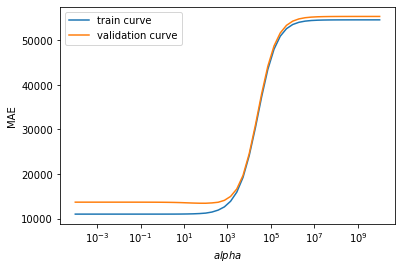

In [106]:
# Visualisation of the results with validation curves for each alpha
# Plot the validation curves
plt.semilogx(gs_results["alpha"], gs_results["train_mae"], label="train curve")
plt.semilogx(
    gs_results["alpha"], gs_results["validation_mae"], label="validation curve"
)
plt.xlabel("$alpha$")
plt.ylabel("MAE")
plt.legend()
plt.show()

**Comments:** We can see that the optimal alpha hyperparameter is 10e2. Level where we have the lowest MAE score. The model starts underfitting above that value and overfits under that value as validation score and train score diverge. We can retrieve the alpha. 

In [107]:
# Get entry with the best validation MSE
best_result = gs_results.loc[gs_results.validation_mae.idxmin()]

# Print the details
print("Best alpha: {:.1e}".format(best_result.alpha))
print("Validation MSE: {:.4f}".format(best_result.validation_mse))
print("Validation MAE: {:,.0f}$".format(best_result.validation_mae))

Best alpha: 1.0e+02
Validation MSE: 0.0036
Validation MAE: 13,458$


##### Cross Validation

**Comments:** Once, we know the best alpha for our complex model, we are now calculate the score on different train/validation splits to see if the model is relatively stable with various alpha. 

In [108]:
# Fit/validate N models
gs_results_3 = []
for run_idx in range(10):

    # Split into train/validation sets
    X_tr, X_val, y_tr, y_val = train_test_split(
        X3_tr, y3_tr, test_size=0.5, random_state=run_idx
    )
    # We calculate the log10 for the target trainning and validation
    log_y_tr = np.log10(y_tr)
    log_y_val = np.log10(y_val)

    # Grid search
    for alpha in np.logspace(-4, 10, num=50):
        # Create and fit ridge regression
        ridge = Ridge(alpha=alpha)
        ridge.fit(X_tr, log_y_tr)

        # Save model and its performance on train/validation sets
        gs_results_3.append(
            {
                "model": ridge,
                "alpha": alpha,
                "run_idx": run_idx,
                "train_mse": MSE(y_tr, ridge.predict(X_tr)),
                "train_mae": MAE(10 ** log_y_tr, 10 ** ridge.predict(X_tr)),
                "validation_mse": MSE(y_val, ridge.predict(X_val)),
                "validation_mae": MAE(10 ** log_y_val, 10 ** ridge.predict(X_val)),
            }
        )

In [109]:
# Convert results to DataFrame
df_gs_results = pd.DataFrame(gs_results_3)
df_gs_results.head()

,model,alpha,run_idx,train_mse,train_mae,validation_mse,validation_mae
0,Ridge(alpha=0.0001),0.000100,0,4.126465e+10,10097.105458,3.814382e+10,14975.619684
1,Ridge(alpha=0.00019306977288832496),0.000193,0,4.126465e+10,10097.110395,3.814382e+10,14975.557589
2,Ridge(alpha=0.0003727593720314938),0.000373,0,4.126465e+10,10097.119917,3.814382e+10,14975.437780
3,Ridge(alpha=0.0007196856730011522),0.000720,0,4.126465e+10,10097.138266,3.814382e+10,14975.206750
4,Ridge(alpha=0.0013894954943731374),0.001389,0,4.126465e+10,10097.173556,3.814382e+10,14974.761764


In [110]:
# Group results by alpha value
gb_alpha = df_gs_results.groupby("alpha")

# Compute train/validation mean scores with std
mean_tr = gb_alpha.train_mae.mean()
mean_val = gb_alpha.validation_mae.mean()
std_tr = gb_alpha.train_mae.std()
std_val = gb_alpha.validation_mae.std()
alphas = mean_tr.index.values

# Get entry with the best mean validation MSE
best_alpha = mean_val.idxmin()
best_result = gb_alpha.get_group(best_alpha)

# Print the details
print("Best alpha: {:.1e}".format(best_alpha))
print("Validation MSE: {:.4f}".format(best_result.validation_mse.mean()))
print("Validation MAE: {:,.0f}$".format(best_result.validation_mae.mean()))

Best alpha: 1.0e+02
Validation MSE: 39936380904.6174
Validation MAE: 13,776$


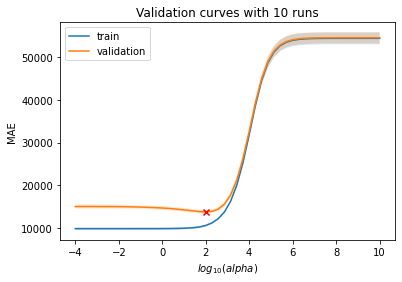

In [111]:
# Plot mean scores
plt.plot(np.log10(alphas), mean_tr, label="train")
plt.plot(np.log10(alphas), mean_val, label="validation")

# Quantify variance with ±std curves
plt.fill_between(np.log10(alphas), mean_tr - std_tr, mean_tr + std_tr, alpha=0.2)
plt.fill_between(np.log10(alphas), mean_val - std_val, mean_val + std_val, alpha=0.2)

# Add marker for best score
plt.scatter(np.log10(best_alpha), mean_val.min(), marker="x", c="red", zorder=10)

plt.title("Validation curves with {} runs".format(len(df_gs_results.groupby("run_idx"))))
plt.xlabel("$log_{10}(alpha)$")
plt.ylabel("MAE")
plt.legend()
plt.show()

**Comments:** For lower alpha, we can see that the MAE difference between the trained and validation model is higher than for higher alpha reflecting that model overfitted for these alpha values. 

#### Evaluate the complex model
We evaluate the complex model on the test set using an alpha at 1.0e+02

In [112]:

# Ridge regression
ridge_final = Ridge(alpha=1.0e+02)
ridge_final.fit(X3_tr, log_y3_tr)

# Compute predictions
y3_pred_val = 10 ** (ridge_final.predict(X3_val))

In [113]:
# Calculation MAE and RSS of the ridge model with Alpha at 1.0e+02
mae_baseline_final = MAE(y3_val, np.median(y3_tr))
mae_ridge_final = MAE(y3_val, y3_pred_val)
rss_ridge_final = RSS(y3_val, y3_pred_val)
R2 = ridge_final.score(X3_val, log_y3_val).round(2)*100
print("MAE Baseline median: ${:.0f}".format(mae_baseline_final))
print("MAE Ridge with regularization: ${:.0f}".format(mae_ridge_final))
print("RSS Ridge with regularization: {:.0f}".format(rss_ridge_final))
print("R2 Ridge with regularization: {:.0f}%".format(R2))

MAE Baseline median: $54873
MAE Ridge with regularization: $13539
RSS Ridge with regularization: 285068660907
R2 Ridge with regularization: 88%


**Comments:** The MAE and R2 have been improved again, down to $13539 with an R2 of 88%. We can accept the model. 

## Post modeling analysis
We are now comparing the performances of our models to improve the model if necessary. As there are multiple model, we will first compare MAE before comparing the distribution of errors between models.

In [114]:
mae_values = [mae_baseline_median, mae_lr1, mae_lr2, mae_ridge_final]

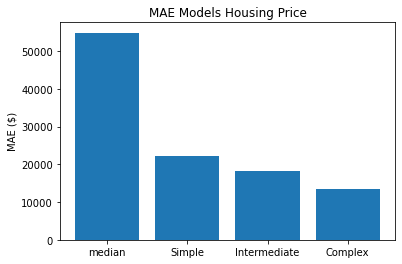

In [115]:
# (C) Final comparison

# Bar plot
mae_values = [mae_baseline_final, mae_lr1, mae_lr2, mae_ridge_final]
titles = ["median", "Simple", "Intermediate", "Complex"]

xcor = np.arange(len(mae_values))
plt.bar(xcor, mae_values)
plt.xticks(xcor, titles)
plt.title("MAE Models Housing Price")
plt.ylabel("MAE ($)")
plt.show()

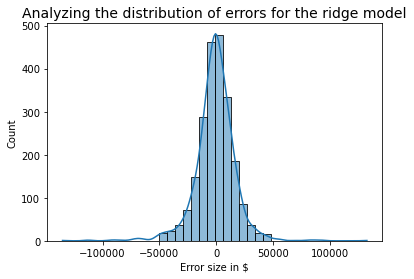

In [116]:
### Error Analysis
y_pred_ridge = 10 ** (ridge_final.predict(X3))
errors_ridge = y_pred_ridge - y3
errors_lr1 = y1_pred_val - y1_val
errors_lr2 = y2_pred_val - y2_val

# Plot histogram with bins of 7000$
sns.histplot(x=errors_ridge, bins=np.arange(-50000, 50000, 7000), kde=True)
plt.title("Analyzing the distribution of errors for the ridge model", fontsize=14)
plt.xlabel("Error size in $")
plt.show()

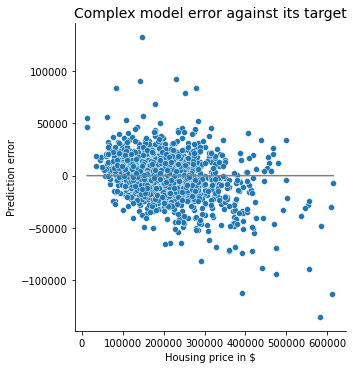

In [117]:
# Plot scatter plot
sns.relplot(x=y3, y=errors_ridge, height=5)

# For horizontal line
y_min, y_max = y3.min(), y3.max()
line_x = np.arange(y_min, y_max, 100)
plt.plot(line_x, 0 * line_x, c="gray")

# Add title and labels
plt.title("Complex model error against its target", fontsize=14)
plt.xlabel("Housing price in $")
plt.ylabel("Prediction error")
plt.show()

In [118]:
# Build a dataframe to store the number of missing values and their percentage for each column. 
d = {"Sale_Price_3": y3, "Complex_model":y_pred_ridge.round(2), "Complex_errors": errors_ridge.round(2) }
model_table = pd.DataFrame(columns=["Sale_Price_3", "Complex_model", "Complex_errors"], data=d)
model_table.head(5)

,Sale_Price_3,Complex_model,Complex_errors
0,236000,226854.10,-9145.90
1,155000,144390.72,-10609.28
2,75000,82872.35,7872.35
3,165500,180947.85,15447.85
4,122000,122733.58,733.58


**Comments:** The Mean absolute error is improving gradually after adding more features from the simple to the complex model. predictions tend to be more accurate. Furthermore, we can see that the complex model errors in $ tend to be higher when house prices are high and the model tend to underestimate the price for this category.For lower prices, the model tend to overestimate the house prices with lower error estimates. 

<a id="Part_3"></a>
# Predicting targets on test data
We are now applying each model on the test dataset. 
We will first look at the dataset, clean it if necessary following the same steps used during the exploratory data anlysis. 

In [119]:
# Loading the data
df_test = pd.read_csv("house-prices-test.csv")
df_test.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition
0,2217,909279080,50,RL,NaN,11275,Pave,NaN,IR1,HLS,...,0,0,NaN,NaN,NaN,0,3,2007,WD,Normal
1,837,907126050,20,RL,65.0,9757,Pave,NaN,Reg,Low,...,92,0,NaN,NaN,NaN,0,10,2009,WD,Normal
2,2397,528144030,60,RL,86.0,11065,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,10,2006,New,Partial
3,1963,535452060,20,RL,70.0,7000,Pave,NaN,Reg,Lvl,...,0,0,NaN,MnWw,NaN,0,4,2007,WD,Family
4,306,911202100,50,C (all),66.0,8712,Pave,Pave,Reg,HLS,...,0,0,NaN,NaN,NaN,0,1,2010,WD,Abnorml


## Looking at missing values

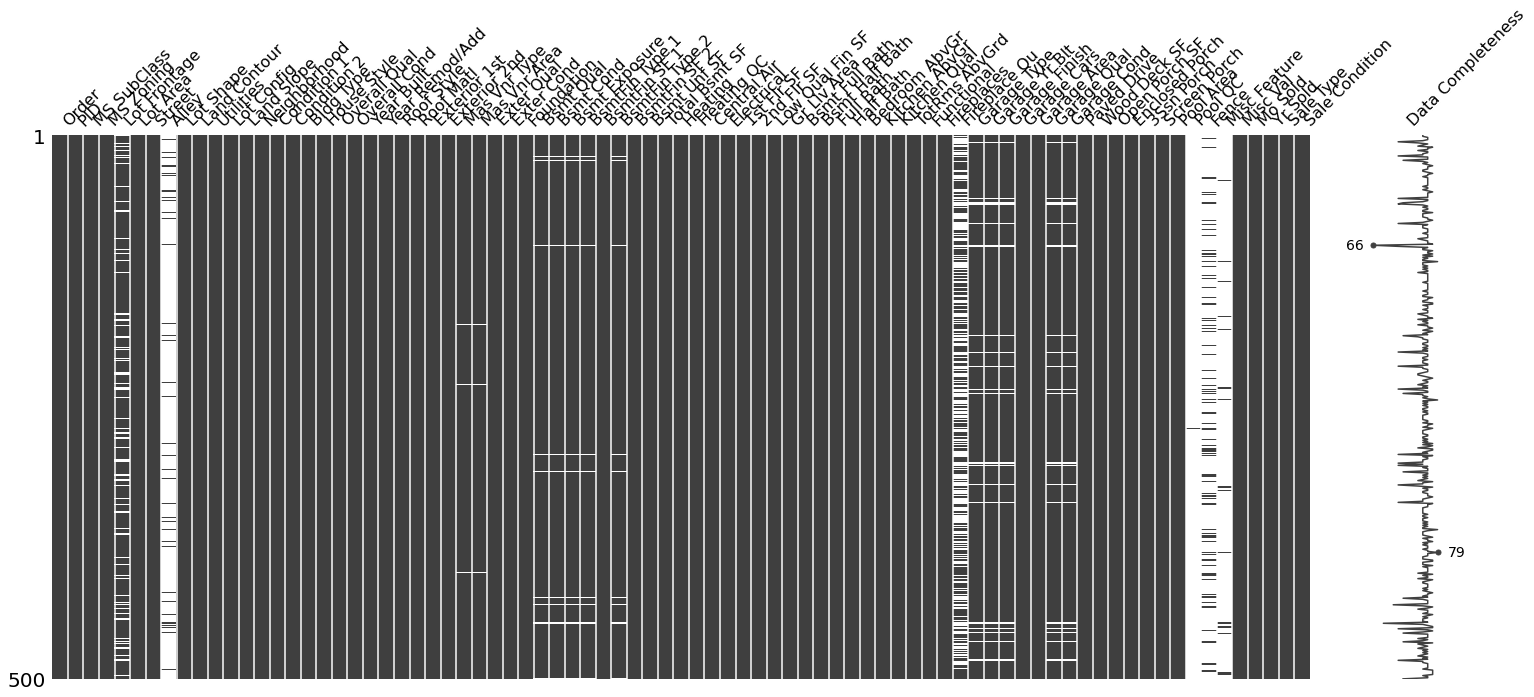

In [120]:
msno.matrix(df_test, labels=True);

In [121]:
# Calculate the number of isnull values per column
missing_values_test = df_test.isnull().sum()

# Calculate the percentage of isnull values per column
missing_values_in_percent = np.round(df_test.isnull().mean() * 100, 2)

# Build a dataframe to store the number of missing values and their percentage for each column. 
columns_list_test = list(df_test.columns)
d = {"Missing values": missing_values_test, "Percentage of missing values": missing_values_in_percent }
missing_summary_test = pd.DataFrame(index=columns_list_test, columns=["Missing values", "Percentage of missing values"], data=d).sort_values(by="Percentage of missing values", ascending=False)

# Set the option to display all rows

missing_summary_test.head(40)

,Missing values,Percentage of missing values
Pool QC,499,99.8
Misc Feature,484,96.8
Alley,465,93.0
Fence,417,83.4
Fireplace Qu,236,47.2
Lot Frontage,70,14.0
Garage Finish,21,4.2
Garage Type,21,4.2
Garage Yr Blt,21,4.2
Garage Qual,21,4.2


In [122]:
#Identify columns with at least 1 missing value
col_to_clean_test = list(df_test.columns[(df_test.isnull().sum() >=1)])
col_to_clean_test

['Lot Frontage',
 'Alley',
 'Mas Vnr Type',
 'Mas Vnr Area',
 'Bsmt Qual',
 'Bsmt Cond',
 'Bsmt Exposure',
 'BsmtFin Type 1',
 'BsmtFin Type 2',
 'Fireplace Qu',
 'Garage Type',
 'Garage Yr Blt',
 'Garage Finish',
 'Garage Qual',
 'Garage Cond',
 'Pool QC',
 'Fence',
 'Misc Feature']

**Comments:** The number of columns with missing values is just 18 against X on the train set. 
We are applying the same preprocessing steps on the test set than the train set.

## Creation of lists of numerical and non numerical features

In [123]:
# Creation of the list of non-numerical features
nn_list_te = list(df_test.select_dtypes(include=["object", "category"]).columns)

# Creation of the list of numerical features
n_list_te = list(df_test.select_dtypes(include=["float", "int64"]).columns)
# Remove Order and PID from the numerical list 
n_list_te.remove("Order")
n_list_te.remove("PID")

#### Cleaning Non numerical features

In [124]:
nn_col_to_clean_te = list(df_test[nn_list_te].columns[(df_test[nn_list_te].isnull().sum() >=1)])
nn_col_to_clean_te

['Alley',
 'Mas Vnr Type',
 'Bsmt Qual',
 'Bsmt Cond',
 'Bsmt Exposure',
 'BsmtFin Type 1',
 'BsmtFin Type 2',
 'Fireplace Qu',
 'Garage Type',
 'Garage Finish',
 'Garage Qual',
 'Garage Cond',
 'Pool QC',
 'Fence',
 'Misc Feature']

There are no non numerical missing values. Lets look at the numerical features

In [125]:
# Replace NA with "Missing"
for column in nn_col_to_clean_te:
    df_test[column].fillna(value="Missing", inplace=True)

In [126]:
# Mapping ordinal data into numerical features
df_test["Lot Shape"] = df_test["Lot Shape"].map({"Missing":0,"Reg":1,"IR1":2,"IR2":3,"IR4":4}, na_action="ignore" ).fillna(0)
df_test["Utilities"] = df_test["Utilities"].map({"Missing":0,"AllPub":1,"NoSewr":2,"NoSewa":3,"ELO":4}, na_action="ignore" ).fillna(0)
df_test["Land Slope"] = df_test["Land Slope"].map({"Missing":0,"Gtl":1,"Mod":2,"Sev":3}, na_action="ignore").fillna(0)
df_test["Exter Qual"] = df_test["Exter Qual"].map({"Missing":0,"Po":1,"Fa":2,"TA":3, "Gd":4, "Ex":5}, na_action="ignore" ).fillna(0)
df_test["Exter Cond"] = df_test["Exter Cond"].map({"Missing":0,"Po":1,"Fa":2,"TA":3, "Gd":4, "Ex":5}, na_action="ignore" ).fillna(0)
df_test["Bsmt Qual"] = df_test["Bsmt Qual"].map({"Missing":0,"Po":1,"Fa":2,"TA":3, "Gd":4, "Ex":5}, na_action="ignore" ).fillna(0)
df_test["Bsmt Cond"] = df_test["Bsmt Cond"].map({"Missing":0,"No":1,"Mn":2,"Av":3, "Gd":4}, na_action="ignore" ).fillna(0)
df_test["Bsmt Exposure"] = df_test["Bsmt Exposure"].map({"Missing":0,"NA":0, "No":1, "Mn":2,"Av":3, "Gd":4}, na_action="ignore" ).fillna(0)
df_test["BsmtFin Type 1"] = df_test["BsmtFin Type 1"].map({"Missing":0, "LwQ":1,"Rec":2,"BLQ":3, "ALQ":4, "GLQ":5}).fillna(0)
df_test["BsmtFin Type 2"] = df_test["BsmtFin Type 2"].map({"Missing":0, "LwQ":1,"Rec":2,"BLQ":3, "ALQ":4, "GLQ":5}).fillna(0)
df_test["Heating QC"] = df_test["Heating QC"].map({"Missing":0, "Po":1,"Fa":2,"TA":3, "Gd":4, "Ex":5}).fillna(0)
df_test['Electrical'] = df_test['Electrical'].map({'Mix':0, 'FuseP':1,'FuseF':2,'FuseA':3,'SBrkr':4}, na_action='ignore').fillna(0)
df_test["Kitchen Qual"] = df_test["Kitchen Qual"].map({"Missing":0,"Po":1,"Fa":2,"TA":3, "Gd":4, "Ex":5}, na_action="ignore" ).fillna(0)
df_test["Functional"] = df_test["Functional"].map({"Missing":0,"Typ":0,"Min1":2,"Min2":3, "Mod":4, "Maj1":5, "Maj2":6, "Sev":7, "Sal":8}, na_action="ignore" ).fillna(0)
df_test["Fireplace Qu"] = df_test["Fireplace Qu"].map({"Missing":0,"Po":1,"Fa":2,"TA":3, "Gd":4, "Ex":5}, na_action="ignore" ).fillna(0)
df_test["Garage Finish"] = df_test["Garage Finish"].map({"Missing":0, "Na":0,"Unf":1,"Rough Finished":2, "Finished":3}).fillna(0)
df_test["Garage Qual"] = df_test["Garage Qual"].map({"Missing":0, "Po":1,"Fa":2,"TA":3, "Gd":4, "Ex":5}).fillna(0)
df_test["Garage Cond"] = df_test["Garage Cond"].map({"Missing":0, "Po":1,"Fa":2,"TA":3, "Gd":4, "Ex":5}).fillna(0)
df_test["Paved Drive"] = df_test["Paved Drive"].map({"Missing":0, "N":1,"P":2,"Y":3}).fillna(0)
df_test["Pool QC"] = df_test["Pool QC"].map({"Missing":0,"Fa":1,"TA":2, "Gd":3, "Ex":4}, na_action="ignore" ).fillna(0)
df_test["Fence"] = df_test["Fence"].map({"Missing":0,"MnWw":1,"GdWo":2, "MnPry":3, "GdPry":4}, na_action="ignore" ).fillna(0)

#### Cleaning numerical features

In [127]:
continuous_features_te = continuous_features.remove("SalePrice")

In [128]:
# Identify features with at least one missing value 
n_cont_col_to_clean_te = list(df_test[continuous_features].columns[(df_test[continuous_features].isnull().sum() >=1)])
n_cont_col_to_clean_te

['Lot Frontage', 'Mas Vnr Area', 'Garage Yr Blt']

There are missing data in 3 columns. We replace these missing values by 0 when there are no garage no lot frontage and because the type of masonery is not mentionned. 

In [129]:
# Replace missing values by 0
df_test[n_cont_col_to_clean_te] = df_test[n_cont_col_to_clean_te].fillna(0)

##### Cleaning discrete numerical features

In [130]:
# Identify features with at least one missing value 
n_disc_col_to_clean_te = list(df_test[discrete_features].columns[(df_test[discrete_features].isnull().sum() >=1)])
n_disc_col_to_clean_te

[]

**Codmments:** There are no missing data in the discrete features. 

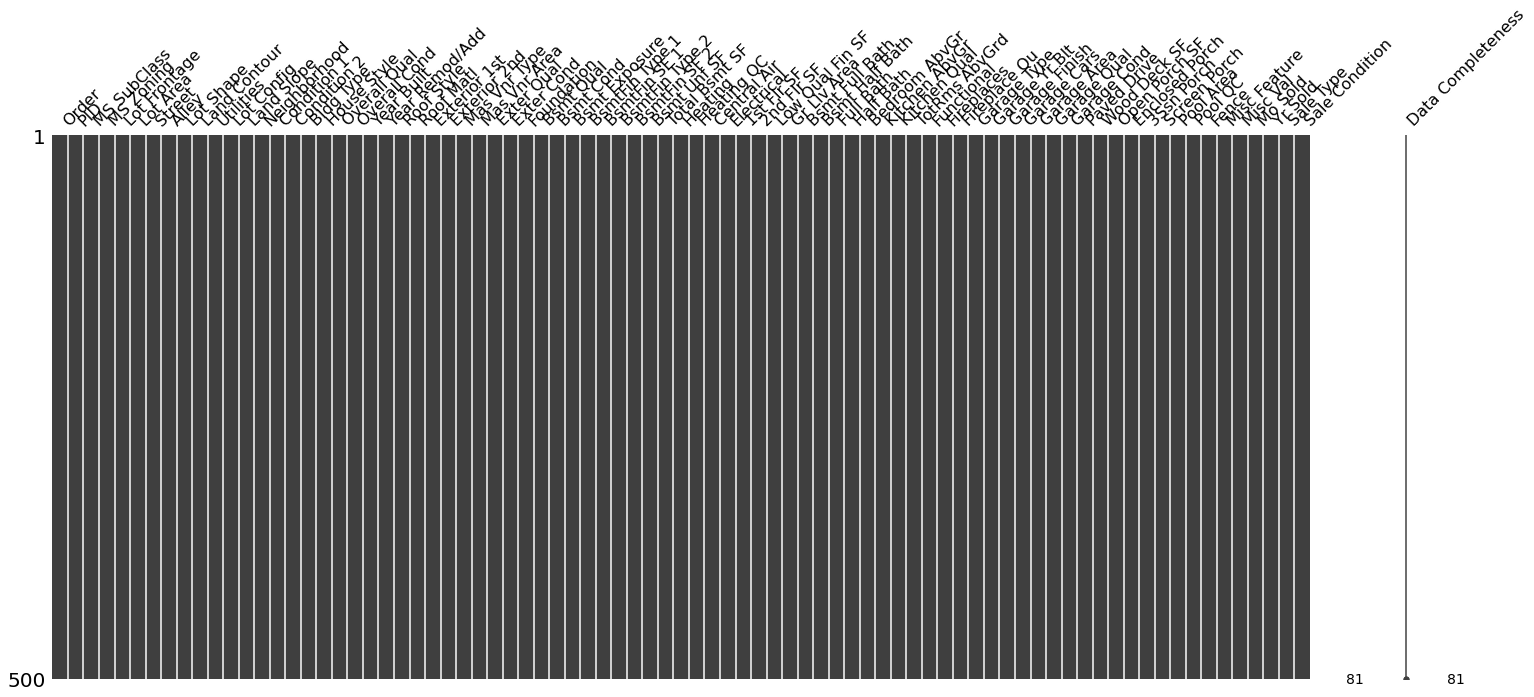

In [131]:
msno.matrix(df_test, labels=True);

## Simple Model
In this model, **we have chosen 3 features, the age, the overall quality and the living area**.

### Create the polynomial feature for years

In [132]:
#Create variables for test
xt_year = df_test["Year Built"].values
xt_year.shape

(500,)

In [133]:
# tranform the polynomial features
X2t_year = pf_obj_year.transform(xt_year[:, np.newaxis])
# Get feature names
feature_namest_yrs = pf_obj_year.get_feature_names_out()
feature_namest_yrs

array(['x0', 'x0^2', 'x0^3'], dtype=object)

In [134]:
# Generate values between min(x) and max(x)
xt_values_year = np.linspace(min(xt_year), max(xt_year), num=X2t_year.shape[0])
Xt_values2_year = pf_obj_year.transform((xt_values_year[:, np.newaxis]))

# Compute predictions for the test set
yt_pred_year = linreg_year.predict(Xt_values2_year)


No handles with labels found to put in legend.
No handles with labels found to put in legend.


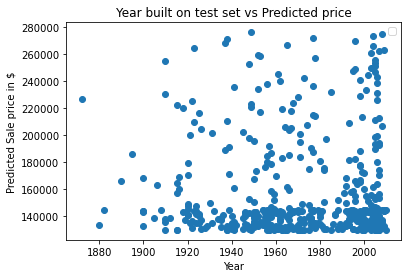

In [160]:
# Plot predictions for the polynomial feature only
plt.scatter(xt_year, yt_pred_year)

plt.title("Year built on test set vs Predicted price")
plt.xlabel("Year")
plt.ylabel("Predicted Sale price in $")
plt.legend()
plt.show()

**Comments:** For the feature year, the predicted price doesn't look in line with the model previously fitted and evaluated. 

### Build the matrix with the age, quality conditions and living area

In [136]:
# Feature transformation to numpy with reshaping to get the same dimensions on test set and polynomial
xt_area = df_test["Gr Liv Area"].values.reshape(-1,1)
xt_qual = df_test["Overall Qual"].values.reshape(-1,1)
X1t = np.concatenate((X2t_year, xt_area, xt_qual), axis=1)
X1t.shape, xt_area.shape, xt_qual.shape, X2t_year.shape

((500, 5), (500, 1), (500, 1), (500, 3))

**Comments:** We have now built a matrix X1 with 5 features including the polynomial 

### Compute predictions for the simple model
#### Fit the model and predict sale price

In [137]:
# We calculate the log of the target training and validation sets
log_y1 = np.log10(y)
X1.shape

(2239, 5)

In [138]:
# Create a linear regression object
lr1 = LinearRegression() 
lr1.fit(X1, log_y1)  # fit the model with the full train set
# predict the target y1_pred_val
y1_pred_val_log = 10 ** lr1.predict(X1_val)

In [139]:
# predict the sale price for test set
y1t_pred_test = 10 ** (lr1.predict(X1t))
y1t_pred_test.shape

(500,)

In [140]:
pid = df_test["PID"]
d = {"PID": pid, "SalePrice": y1t_pred_test }

In [141]:
# Build a dataframe with sales price predictions
pid = df_test["PID"]
d = {"PID": pid, "SalePrice": y1t_pred_test }
df_simple_model = pd.DataFrame(columns=["PID", "SalePrice"], data=d)
df_simple_model.head()

,PID,SalePrice
0,909279080,172835.933875
1,907126050,131227.582593
2,528144030,278804.257626
3,535452060,125451.661029
4,911202100,86663.965191


In [142]:
# Checking major statistic indicators of target values coming from the simple model 
df_simple_model.describe()

,PID,SalePrice
count,5.000000e+02,500.000000
mean,7.121658e+08,184419.756726
std,1.888879e+08,80946.851919
min,5.263510e+08,65252.946540
25%,5.284576e+08,127068.574951
50%,5.354532e+08,164300.521032
75%,9.072555e+08,219226.177573
max,9.232771e+08,889141.491050


In [143]:
df["SalePrice"].describe()

count      2430.000000
mean     180199.692593
std       79607.467171
min       12789.000000
25%      129000.000000
50%      160000.000000
75%      213099.750000
max      755000.000000
Name: SalePrice, dtype: float64

**Comments:** We can see that major metrics such as the mean, standart deviation, the 25% and 75% are quite close in both the target prdicted values and the sale price coming from the initial dataset. We can keep these results. 

#### Save the result in a csv file

In [144]:
# Save dataframe in a csv file
df_simple_model.to_csv("predictions-simple-model.csv", encoding="utf-8", index=False)

## Intermediate model

**Comments:** We are building the test matrix with the same columns than the intermediate model before

### Matrix construction

#### Non numerical categorical features and encoding

In [145]:
select_non_num_cat = ["Foundation", "Exterior 1st", "Neighborhood", "House Style"] # categorical select features
select_non_num_ordinal= ["Kitchen Qual", "Lot Shape", "Exter Qual", "Heating QC"] # non numerical features converted into integers based on their rank. 

In [146]:
# Select the non numerical categorical features 
dft_nn_cat = df_test[select_non_num_cat].copy()

# Create the dummy features and drop the redundant columns
encoded_dft = pd.get_dummies(dft_nn_cat, drop_first=True)
encoded_dft.head()

,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Exterior 1st_BrkFace,Exterior 1st_CemntBd,Exterior 1st_HdBoard,Exterior 1st_MetalSd,Exterior 1st_Plywood,Exterior 1st_Stucco,...,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,House Style_1.5Unf,House Style_1Story,House Style_2.5Fin,House Style_2.5Unf,House Style_2Story,House Style_SFoyer,House Style_SLvl
0,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [147]:
encoded_df.shape, encoded_dft.shape

((2239, 52), (500, 44))

Comments : there are less columns in the encoded test dataframe than in the initial dataframe. Consequently, we are adding the columns coming from the train set set into the test set. 

In [148]:
# Printing columns names in both encoded data sets and specifically in the train and test set.
set1 = set(encoded_df.columns)
set2 = set(encoded_dft.columns)

only_in_list1 = set1 - set2  
only_in_list2 = set2 - set1  
in_both = set1 & set2      
nb_columns_list1 = len(only_in_list1)
nb_columns_list2 = len(only_in_list2)

print("Only in list1:", only_in_list1, "Nb columns:", nb_columns_list1)
print("Only in list2:", only_in_list2, "Nb columns:", nb_columns_list2)


Only in list1: {'Exterior 1st_Stone', 'Exterior 1st_BrkComm', 'Neighborhood_Landmrk', 'Neighborhood_GrnHill', 'Exterior 1st_ImStucc', 'Foundation_Wood', 'Exterior 1st_CBlock', 'Neighborhood_Greens'} Nb columns: 8
Only in list2: set() Nb columns: 0


**Comments:** We are adding the columns located in the encoded_df into the nest encoded test set.

In [149]:
# Create a DataFrame with the columns only in encoded_df, filling with 0
df_only_in_list1 = encoded_dft.reindex(columns=only_in_list1, fill_value=0)
df_only_in_list1.shape

(500, 8)

In [150]:
# Concatenate these columns to encoded_dft
dft_new = pd.concat([encoded_dft, df_only_in_list1], axis=1)
dft_new.shape

(500, 52)

In [151]:
# Reindex dft_new to have the same column order as encoded_df
encoded_dft_new = dft_new.reindex(columns=encoded_df.columns)
# creation of the matrix 
X2t_nn_cat = encoded_dft_new.values
encoded_dft_new.shape

(500, 52)

In [152]:
encoded_dft_new.head()

,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Exterior 1st_BrkComm,Exterior 1st_BrkFace,Exterior 1st_CBlock,Exterior 1st_CemntBd,Exterior 1st_HdBoard,...,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,House Style_1.5Unf,House Style_1Story,House Style_2.5Fin,House Style_2.5Unf,House Style_2Story,House Style_SFoyer,House Style_SLvl
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Comments:** The two datasets have now the same number of columns. 

#### Non numerical ordinal features
We create the matrix containing ordinal features

In [153]:
X2t_nn_ord = df_test[select_non_num_ordinal].values

#### Numerical features and standardization of the test set

In [161]:
# Selecting numerical features
select_num = ["Overall Qual", "Fireplaces", "TotRms AbvGrd", "Full Bath", "Garage Area", "Gr Liv Area", "Year Built"]
dft_n = df_test[select_num].copy()
dft_n.describe()

,Overall Qual,Fireplaces,TotRms AbvGrd,Full Bath,Garage Area,Gr Liv Area,Year Built
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,6.124000,0.620000,6.608000,1.594000,476.902000,1541.416000,1972.274000
std,1.394458,0.654566,1.664896,0.574303,211.744251,547.214249,30.440305
min,2.000000,0.000000,3.000000,0.000000,0.000000,540.000000,1872.000000
25%,5.000000,0.000000,6.000000,1.000000,312.750000,1173.500000,1953.000000
50%,6.000000,1.000000,6.000000,2.000000,480.000000,1454.500000,1975.000000
75%,7.000000,1.000000,7.000000,2.000000,576.250000,1769.500000,2001.250000
max,10.000000,3.000000,12.000000,4.000000,1220.000000,4676.000000,2010.000000


**Comments:** The values included into the test set are similar than the values observed in the train set.We standardize the data, necessary step to reduce overfitting of the model.

In [162]:
# Creation of the two matrix containing numerica features
X2t_n = dft_n.values


In [163]:
# Standardize non numerical and numerical data
X2t_nn_cat_standardized = scale(X2t_nn_cat, axis=0)
X2t_nn_ord_standardized = scale(X2t_nn_ord, axis=0)
X2t_n_standardized = scale(X2t_n, axis=0)

##### Concatenate matrix

In [164]:
X2t_n_standardized.shape, X2t_nn_ord_standardized.shape, X2t_nn_cat_standardized.shape

((500, 7), (500, 4), (500, 52))

In [165]:
# Concatenation of numerical and non numerical matrix
X2t = np.concatenate((X2t_nn_cat_standardized, X2t_nn_ord_standardized, X2t_n_standardized), axis=1)
X2t.shape, y.shape

((500, 63), (2239,))

**Comments:** There are 64 columns in the test and train sets. 

### Predict target values
#### Fit the model and predict sale price
We fit again the model on the train et validation datasets.

In [166]:
# Fit the linear regression model on the train  and validation sets
log_y2 = np.log10(y)
# Create a linear regression object
lr2 = LinearRegression() 
lr2.fit(X2, log_y2)  # Fit it to train data

# Predict data
y2t_pred_test = 10 ** lr2.predict(X2t)

**Comments:** We are now predicting Sales price based on the fitted model Lr2

In [167]:
# Build a dataframe with sales price predictions
pid = df_test["PID"]
d = {"PID": pid, "SalePrice": y2t_pred_test }
df_inter_model = pd.DataFrame(columns=["PID", "SalePrice"], data=d)
df_inter_model.describe()

,PID,SalePrice
count,5.000000e+02,500.000000
mean,7.121658e+08,181772.839744
std,1.888879e+08,72608.757583
min,5.263510e+08,63960.019695
25%,5.284576e+08,131112.284879
50%,5.354532e+08,163874.196437
75%,9.072555e+08,213411.567346
max,9.232771e+08,642295.732625


In [168]:
df["SalePrice"].describe()

count      2430.000000
mean     180199.692593
std       79607.467171
min       12789.000000
25%      129000.000000
50%      160000.000000
75%      213099.750000
max      755000.000000
Name: SalePrice, dtype: float64

**Comments:** We can see that the statistics of the target value is very close to the statistic of the dataframe Sale Price. We can accept this result. 

#### Save the result in a csv file

In [169]:
# Save dataframe in a csv file
df_inter_model.to_csv("predictions-intermediate-model.csv", encoding="utf-8", index=False)

## Complex model
we will apply the same principle than earlier to build the complex model and use all features. 

### Build the matrix
#### Non numerical categorical features


In [170]:
# Create a list of non numerical categorical for encoding
non_numerical_categorical_list = list(set(non_numerical_list) - set(non_numerical_ordinal_list))
# Check the shape of the lists
len(non_numerical_categorical_list), len(non_numerical_list), len(non_numerical_ordinal_list)

(22, 43, 21)

In [171]:
# Selection of non numerical categorical features in the test set
dft_nn_c = df_test[non_numerical_categorical_list].copy()

In [172]:
encoded_df_c.shape

(2239, 143)

In [173]:
# Create the dummy features and drop the redundant columns
encoded_dft_c = pd.get_dummies(dft_nn_c, drop_first=True)
encoded_dft_c.head()

,Mas Vnr Type_BrkFace,Mas Vnr Type_Missing,Mas Vnr Type_None,Mas Vnr Type_Stone,Bldg Type_2fmCon,Bldg Type_Duplex,Bldg Type_Twnhs,Bldg Type_TwnhsE,Foundation_CBlock,Foundation_PConc,...,Heating_Wall,Exterior 1st_BrkFace,Exterior 1st_CemntBd,Exterior 1st_HdBoard,Exterior 1st_MetalSd,Exterior 1st_Plywood,Exterior 1st_Stucco,Exterior 1st_VinylSd,Exterior 1st_Wd Sdng,Exterior 1st_WdShing
0,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


**Comments:** After one-hot encoding, we have 122 columns, whereas the initial encoding of non-numerical data in the training set resulted in 143 columns. Therefore, we will add the missing columns and reindex them to match the structure used in the intermediate model.

In [174]:
encoded_df_c.head()

,Mas Vnr Type_BrkFace,Mas Vnr Type_CBlock,Mas Vnr Type_None,Mas Vnr Type_Stone,Bldg Type_2fmCon,Bldg Type_Duplex,Bldg Type_Twnhs,Bldg Type_TwnhsE,Foundation_CBlock,Foundation_PConc,...,Exterior 1st_CemntBd,Exterior 1st_HdBoard,Exterior 1st_ImStucc,Exterior 1st_MetalSd,Exterior 1st_Plywood,Exterior 1st_Stone,Exterior 1st_Stucco,Exterior 1st_VinylSd,Exterior 1st_Wd Sdng,Exterior 1st_WdShing
0,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,1,0,0,0,0,0,1,0,1,0,...,1,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [175]:
# Adjusting the number of columns 
# Printing columns names in both encoded data sets in the train and test set.

only_in_list1_c = set(encoded_df_c.columns) - set(encoded_dft_c.columns) 
only_in_list2_c = set(encoded_dft_c.columns) - set(encoded_df_c.columns)      
nb_columns_list1_c = len(only_in_list1_c)
nb_columns_list2_c = len(only_in_list2_c)

print("Only in list1:", only_in_list1_c, "Nb columns:", nb_columns_list1_c)
print("Only in list2:", only_in_list2_c, "Nb columns:", nb_columns_list2_c)

Only in list1: {'Condition 2_RRAe', 'Exterior 1st_Stone', 'Neighborhood_Landmrk', 'Exterior 2nd_AsphShn', 'Exterior 1st_ImStucc', 'Sale Type_Con', 'Condition 2_RRAn', 'Heating_GasA', 'Condition 2_RRNn', 'Neighborhood_Greens', 'Condition 2_PosA', 'Sale Type_VWD', 'Exterior 1st_CBlock', 'Roof Matl_Metal', 'Roof Matl_WdShngl', 'Misc Feature_TenC', 'Mas Vnr Type_CBlock', 'Exterior 1st_BrkComm', 'MS Zoning_C (all)', 'Neighborhood_GrnHill', 'Roof Style_Shed', 'Foundation_Wood', 'Misc Feature_Missing', 'Condition 2_Feedr', 'MS Zoning_I (all)'} Nb columns: 25
Only in list2: {'Garage Type_Missing', 'Exterior 2nd_Other', 'Mas Vnr Type_Missing', 'Roof Matl_Roll'} Nb columns: 4


In [176]:
# Checking the number of values with unknown data in the test set vs train set
col_list_2 = ['Exterior 2nd', 'Mas Vnr Type', 'Roof Matl', 'Garage Type']
    
# Dictionary to store results
counts_dict = {}

for col in col_list_2:
    counts_dict[col] = df_test[col].value_counts()

# Print the counts for each column
for col, counts in counts_dict.items():
    print(f"Counts in column '{col}':")
    print(counts)
    print("\n")

Counts in column 'Exterior 2nd':
VinylSd    165
MetalSd     81
Wd Sdng     70
HdBoard     64
Plywood     46
CmentBd     32
Wd Shng     14
Stucco      10
AsbShng      6
BrkFace      4
ImStucc      3
Brk Cmn      2
Stone        1
Other        1
CBlock       1
Name: Exterior 2nd, dtype: int64


Counts in column 'Mas Vnr Type':
None       310
BrkFace    144
Stone       39
BrkCmn       4
Missing      3
Name: Mas Vnr Type, dtype: int64


Counts in column 'Roof Matl':
CompShg    495
WdShake      2
Tar&Grv      2
Roll         1
Name: Roof Matl, dtype: int64


Counts in column 'Garage Type':
Attchd     295
Detchd     132
BuiltIn     39
Missing     21
Basment      8
CarPort      4
2Types       1
Name: Garage Type, dtype: int64




**Comments:** We can see that most of the differences in the columns names are coming from the encoded train set and there are only 4 column which is included in the test set. Consequently, we will add these columns in the encoded df test table with 0 as a data. On the other hand, the columns "Garage Type_Missing" has been created in the encoded test set. 
For the results included in the test set but not in the train set, we decide to replace "other", "missing" and "roll" by the most common value of the feature in question (i.e. "VinylSd", "None" and "CompShg"). Indeed, there are a roof, an exterior and masonry, but the information is unknown. However for the Garage, there is no garage at all. This information is important and there are 21 houses with a garage type labeled as "missing"; we must keep this column in the test encoded set and add it in the train encoded set. Therefore, we are adding a new column "Garage Type_Missing" in the initial encoded train set filled with 0. "

In [177]:
# Replace values in each column
col_list_2_2 = ['Exterior 2nd', 'Mas Vnr Type', 'Roof Matl']
for col in col_list_2:
    # Find the most frequent value (mode) in each column of the train set
    mode_value = df_2[col].mode()[0]
    
    # Replace "Other", "Missing", and "Roll" with the mode value in the test set
    df_test[col] = df_test[col].replace({"Other": mode_value, "Missing": mode_value, "Roll": mode_value})


In [178]:
# Create a DataFrame with the columns only in encoded_test_df with 1 column ("Garage Type_Missing")
col_list_2_1 = ["Garage Type_Missing"]
df_only_in_list2_c = encoded_df_c.reindex(columns=col_list_2_1, fill_value=0)

In [179]:
# Add columns "Garage Type_Missing" to the train set 
encoded_df_c_new = pd.concat([encoded_df_c, df_only_in_list2_c], axis=1)
encoded_df_c_new.shape

(2239, 144)

In [180]:
# Create a DataFrame with the columns only in encoded_df with 25 columns
df_only_in_list1_c = encoded_dft_c.reindex(columns=only_in_list1_c, fill_value=0)
df_only_in_list1_c.shape

(500, 25)

In [181]:
encoded_df_c_new.columns 

Index(['Mas Vnr Type_BrkFace', 'Mas Vnr Type_CBlock', 'Mas Vnr Type_None',
       'Mas Vnr Type_Stone', 'Bldg Type_2fmCon', 'Bldg Type_Duplex',
       'Bldg Type_Twnhs', 'Bldg Type_TwnhsE', 'Foundation_CBlock',
       'Foundation_PConc',
       ...
       'Exterior 1st_HdBoard', 'Exterior 1st_ImStucc', 'Exterior 1st_MetalSd',
       'Exterior 1st_Plywood', 'Exterior 1st_Stone', 'Exterior 1st_Stucco',
       'Exterior 1st_VinylSd', 'Exterior 1st_Wd Sdng', 'Exterior 1st_WdShing',
       'Garage Type_Missing'],
      dtype='object', length=144)

In [182]:
# Add columns to the encoded train set and reindex the encoded test set

In [183]:
# Concatenate these columns to encoded_dft_c
dft_new_c = pd.concat([encoded_dft_c, df_only_in_list1_c], axis=1)
# Reindex the test encoded set based on the train encoded set.
encoded_dft_c_new = dft_new_c.reindex(columns=encoded_df_c_new.columns)
encoded_dft_c_new.shape

(500, 144)

**Comments:** We have now 144 columns which is in line with the encoded non numerical train set (encoded_df_c). Now we can add this encoded dataset to the numerical feature dataset

In [184]:
X3t_nn_cat = encoded_dft_c_new.values

#### Non numerical ordinal features

In [185]:
X3t_nn_ord = df_test[non_numerical_ordinal_list].values

#### Creation of the matrix containing numerical features

In [186]:
# Creation of the matrix containing numerical features
X3t_n = df_test[n_list_te].values

#### Standardization

##### Creation of the train matrix for the complex model

In [187]:
X3_nn_cat_new = encoded_df_c_new.values

In [188]:
X3_nn_cat_standardized_new = scale(X3_nn_cat_new, axis=0)
X3_new = np.concatenate((X3_nn_cat_standardized_new, X3_n_standardized, X3_nn_ord_standardized), axis=1)

In [189]:
X3t_nn_cat.shape, X3_nn_cat_new.shape

((500, 144), (2239, 144))

##### Standardization and creation of the test matrix for the complex model

In [190]:
# Standardize non numerical and numerical data
X3t_nn_cat_standardized = scale(X3t_nn_cat, axis=0)
X3t_nn_ord_standardized = scale(X3t_nn_ord, axis=0)
X3t_n_standardized = scale(X3t_n, axis=0)


In [191]:
np.mean(X3_n_standardized)

-2.436970116878563e-16

In [192]:
# Concatenation of numerical and non numerical matrix
X3t = np.concatenate((X3t_n_standardized, X3t_nn_cat_standardized,  X3t_nn_ord_standardized), axis=1)

In [193]:
# Check shapes of the train set, the train set modified matrix
X3_nn_cat_standardized_new.shape, X3_nn_ord_standardized.shape, X3_n_standardized.shape, X3_new.shape, X3.shape

((2239, 144), (2239, 21), (2239, 36), (2239, 201), (2239, 200))

In [194]:
# Check shapes of the test set modified matrix
X3t.shape, X3_new.shape, X3t_n_standardized.shape, X3t_nn_cat_standardized.shape,  X3t_nn_ord_standardized.shape

((500, 201), (2239, 201), (500, 36), (500, 144), (500, 21))

In [195]:
X3t.shape, X3.shape, X3_new.shape

((500, 201), (2239, 200), (2239, 201))

**Comments** We have now 270 features such as in the model initially trained.

### Predict target values 
We will now fit the ridge model with penalization term alpha initially selected before predicting new values. 

#### Fit the model with train set

In [196]:
# We calculate the log of the target based on the full train set
log_y3_all = np.log10(y3)
X3.shape, log_y3_all.shape

((2239, 200), (2239,))

In [197]:
# Ridge regression
ridge_test = Ridge(alpha=1.0e+02)
ridge_test.fit(X3_new, log_y3_all)

# Compute predictions
y3t_pred_test = 10 ** (ridge_test.predict(X3t))

In [198]:
# Build a dataframe with sales price predictions
pid = df_test["PID"]
sale_price_3 = y3t_pred_test

df_complex_model = pd.DataFrame({"PID": pid, "SalePrice": sale_price_3})

In [199]:
df_complex_model.describe()

,PID,SalePrice
count,5.000000e+02,500.000000
mean,7.121658e+08,171816.193190
std,1.888879e+08,30761.801234
min,5.263510e+08,103143.726471
25%,5.284576e+08,157606.081142
50%,5.354532e+08,168990.198158
75%,9.072555e+08,182290.324467
max,9.232771e+08,474271.509666


In [200]:
df_2["SalePrice"].describe()

count      2239.000000
mean     183266.744975
std       77222.464323
min       12789.000000
25%      132000.000000
50%      164500.000000
75%      215000.000000
max      615000.000000
Name: SalePrice, dtype: float64

#### Save the result in a csv file

In [201]:
# Save dataframe in a csv file
df_complex_model.to_csv("predictions-complex-model.csv", encoding="utf-8", index=False)

In [202]:
d = {"PID": pid, "Sale Price Simple": y1t_pred_test, "Sale Price Intermediate": y2t_pred_test , "Sale Price Complex": y3t_pred_test}
df_summary_model = pd.DataFrame(columns=["PID", "Sale Price Simple", "Sale Price Intermediate", "Sale Price Complex"], data=d)

**Comments** In this last model, we can see that the mean, maximum, and quartiles are similar to those of the simple and intermediate models. However, the standard deviation is very low, indicating that most of the predictions are concentrated around the average. This suggests that the model is overfitting, despite having introduced transformations, regularization, and performed grid search and cross-validation to tune and validate the hyperparameter alpha.

#### Post model analysis

In [203]:
df_summary_model.head(10)

,PID,Sale Price Simple,Sale Price Intermediate,Sale Price Complex
0,909279080,172835.933875,190648.257220,214184.864809
1,907126050,131227.582593,139860.765833,168970.241001
2,528144030,278804.257626,284598.643823,153257.129233
3,535452060,125451.661029,129612.572665,167618.136378
4,911202100,86663.965191,93382.683636,166469.469784
5,531382090,184206.795975,172609.836266,166432.764108
6,902477130,66959.818630,63960.019695,110963.743884
7,527402150,140440.694269,143023.561709,180374.659799
8,908102320,139553.401541,143253.236082,161310.273018
9,908276140,110463.073820,109769.645013,176105.825723


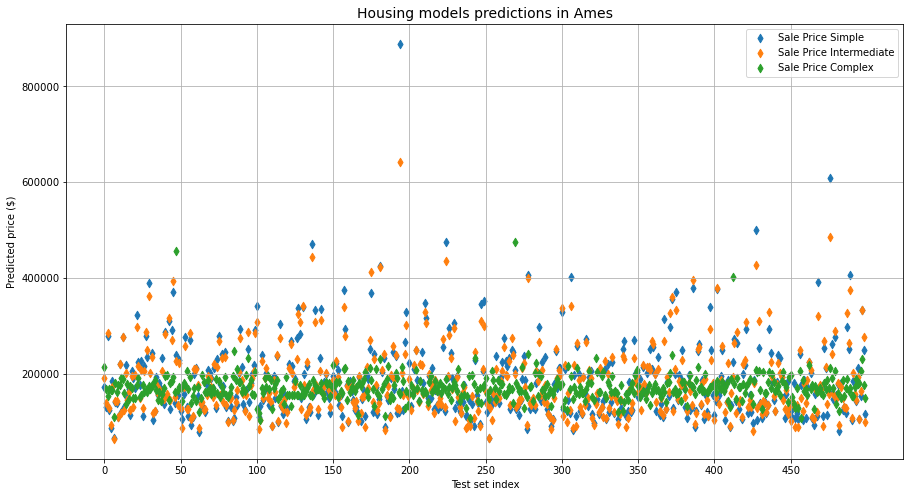

In [204]:
# Setup
plt.figure(figsize=(15, 8))
ind = df_summary_model.index
s = 10

# Plots
plt.scatter(ind, df_summary_model["Sale Price Simple"], color="C0", marker="d", label="Sale Price Simple")
plt.scatter(ind, df_summary_model["Sale Price Intermediate"], color="C1", marker="d", label="Sale Price Intermediate")
plt.scatter(ind, df_summary_model["Sale Price Complex"], color="C2", marker="d", label="Sale Price Complex")

# Add title, labels, etc.
plt.title("Housing models predictions in Ames", fontsize=14)
plt.xlabel("Test set index")
plt.ylabel("Predicted price ($)")

plt.grid(True)
plt.xticks(ticks=np.arange(0, 500, 50))
plt.legend(loc="best")

plt.show()

**Comments:** As highlighted in the statistics table with the low standard deviation, we can see in this plot that the complex model tends to predict house prices near the average price (around $180,000). And it doesn't account for the specific features of houses that could positively impact the price and lead to higher values. 
In conclusion, we can see that limiting the number of features to 15 provides a good result, reducing overfitting and we should use this intermediate model to predict house prices in Ames. 

Here is the end of the notebook
<a id="bottom"></a>
[back to top](#top)